# Sediment Contamination Assessment

## Table of Contents

1. [Data Preprocessing](#data-preprocessing)
   - [Take Log-Transformation(except: "As", "Bi") + Z-score Standardization on chemical features](#take-log-transformationexcept-as-bi--z-score-standardization-on-chemical-features)

2. [Principal Component Analysis](#principal-component-analysis)
   - [PCA on the processed chemical features](#pca-on-the-processed-chemical-features)

3. [Clearer PCA interpretation by clustering variables](#hierarchical-clustering)
   - [HCPC: Hierarchical Clustering on Principal Components](#hcpc-hierarchical-clustering-on-principal-components)

4. [Validate the PC scores for chemicals](#contamination-assessment)
   - [Validate the PC scores for chemicals and reveal potential spatial patterns](#compute-pc-scores-for-sites-and-sum-the-scores-for-contamination-assessment)

5. [Taxa Composition Analysis](#taxa-composition-analysis)
   - [TO DO: ANOVA of taxa composition against levels of PC scores (stressor)](#to-do-anova-of-taxa-composition-against-levels-of-pc-scores-stressor)

6. [Sum up PC scores for contamination assessment scores](#compute-the-contamination-score-by-summing-the-pc-scores-for-sites)
   - [Raw PC scores distribution analysis](#check-the-values-of-raw-pc-scores-that-betray-the-assumption-of-equally-pollutant)
   - [Transform the raw PC scores to z-scores with equally pollutant assumption](#z-score-transform-the-pc-scores)
   - [Z-scored PC scores distribution visualization](#create-overlapping-ridge-plot-for-z-scored-pc-scores-using-seaborn-facetgrid)
   - [Abnormal detected: extreme values found in PC3 scores](#abnormal-detected-extreme-values-found-in-pc3-scores)
   - [Min-Max scaling comparison](#check-the-results-of-min-max-scaling-of-pc-scores)
   - [Investigation of extreme PC3 values](#check-the-extreme-values-in-pc3-scores)


In 01_EDA.ipynb, the raw values distribution, spatial distribution and the transformation performance have 
been checked.  

It shows that log-transformation can reduce the skewness of the raw values distribution and z-score standardization can 
eliminate the scale differences among chemicals.

Therefore, the log-transformation + z-score standardization is kept here to preprocess the chemicals before PCA analysis on the contamination assessment.

## Take Log-Transformation(except: "As", "Bi") + Z-score Standardization on chemical features

The log-transformation aims to reduce the skewness of the raw value, if it does not then not apply.

The Z-score standardization aims to eliminate the scale difference effects among chemicals, it is necessary to avoid the large range chemicals dominating the PCA results, because large range is **not equivalent** to high pollution level.

In [199]:
# read the contacted data 
import pandas as pd
from zci.data_process.dataframe_ops import get_block, concat_blocks
# read the contacted data set
data = pd.read_excel("../data/processed/complete_env_taxa_chemical.xlsx",
                     sheet_name="all_data_merged",
                     header=[0,1,2],
                     index_col=0)

# Remove multi-index levels from columns
raw_data = data.copy()
raw_data.columns = raw_data.columns.droplevel([0, 1])

data.head()

block     sample_info                           environmental            \
subblock          raw                                     raw             
var          Latitude Longitude Waterbody  Year       LOI (%) MPS (Phi)   
StationID                                                                 
A10          42.90455 -82.46760       SCR  2004      3.436193  1.734259   
A23          42.56658 -82.57595       LSC  2004      3.226637  1.969984   
A27          42.56007 -82.42132       LSC  2004      2.802642  1.319519   
A28          42.54577 -82.42073       LSC  2004      3.201399  1.398687   
A29          42.51440 -82.43462       LSC  2004      6.180718  1.065748   

block                                                                      \
subblock                                                                    
var       Measured Depth (m) Temperature (oC) Velocity  at bottom (m/sec)   
StationID                                                                   
A10                      1.8            19.17                         NaN   
A23                      3.0            19.10                         NaN   
A27                      1.0            18.40                         NaN   
A28                      0.5            18.90                         NaN   
A29                      0.5            19.30                         NaN   

block                             ...           taxa                          \
subblock                          ...            raw                           
var       Water DO Bottom (mg/L)  ... Hydropsychidae      Hydrozoa  Nematoda   
StationID                         ...                                          
A10                        10.21  ...   3.203427e-16  3.203427e-16  1.727234   
A23                        10.09  ...   3.203427e-16  3.203427e-16  2.427993   
A27                        10.30  ...   3.203427e-16  3.203427e-16  1.802219   
A28                        12.80  ...   3.203427e-16  3.203427e-16  2.771800   
A29                         9.70  ...   3.203427e-16  3.203427e-16  4.616441   

block                                                                \
subblock                                                              
var       Oligochaeta Other Trichoptera   Sphaeriidae   Turbellaria   
StationID                                                             
A10          6.576942      3.203427e-16  3.203427e-16  3.203427e-16   
A23          5.872905      3.203427e-16  1.022139e+00  5.997595e-01   
A27          6.402280      1.580169e+00  1.317615e+00  9.964067e-01   
A28          5.867874      2.049287e+00  2.863547e+00  3.203427e-16   
A29          5.181664      3.203427e-16  3.203427e-16  3.203427e-16   

block     2008_results                          
subblock   DR_clusters       corridor_clusters  
var         DR_cluster if_RF  corridor_cluster  
StationID                                       
A10                  0     0                 1  
A23                  0     0                 1  
A27                  0     0                 1  
A28                  0     0                 1  
A29                  0     0                 1  

[5 rows x 59 columns]

In [200]:
from scipy.stats import zscore
import numpy as np

# make logrithm trans and z-score standardization on chemical features
z_score_log_pollution = data[("chemical", "raw")].copy()
for col in z_score_log_pollution.columns:
    if col not in ["As", "Bi"]:
        # apply log-transformation
        z_score_log_pollution[col] = np.log1p(z_score_log_pollution[col])
    # z-score standardization to all cols
    z_score_log_pollution[col] = zscore(z_score_log_pollution[col])
    
# check the results
z_score_log_pollution.head()

/var/folders/s5/r1s56_ps46lbbv1370hjn_vr0000gn/T/ipykernel_20017/1290322065.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  z_score_log_pollution = data[("chemical", "raw")].copy()


var,%OC,1234-TCB,1245-TCB,Al,As,Bi,Ca,Cd,Co,Cr,...,OCS,Pb,QCB,Sb,V,Zn,mirex,"p,p'-DDD","p,p'-DDE",total PCB
StationID,,,,,,,,,,,,,,,,,,,,,
A10,1.041046,2.125634,0.169750,-0.586740,-0.024307,0.102204,-0.000092,-0.182495,-0.918596,-0.151767,...,-0.313676,0.281771,-0.740873,0.707030,-0.290731,0.100400,-0.595897,-0.191904,-0.344862,-0.399340
A23,0.916491,1.541645,0.082743,0.041978,0.406751,-0.039232,0.818217,0.181670,0.005767,0.182336,...,-0.691071,-0.023755,0.330011,-0.117925,-0.041587,0.191726,0.111956,0.077966,0.138363,0.367180
A27,0.644395,0.910079,0.212018,1.842406,0.592565,-1.730117,0.793904,-0.472558,1.167605,1.257335,...,-0.124418,0.006883,-0.760352,-1.926702,1.447647,0.686685,1.061567,0.873203,0.150182,0.444628
A28,0.901075,0.026932,-0.176590,1.735454,0.479723,-1.728875,0.339215,-0.870737,0.969082,1.060326,...,-0.486247,-0.089400,-0.573113,-1.926702,1.218564,0.581234,-0.595897,0.898444,0.406577,-0.506977
A29,2.280680,0.336407,0.080577,2.742688,1.326794,-1.720237,0.736354,-0.729602,2.346421,2.501328,...,0.225084,0.706738,-0.345061,-1.839908,2.467668,1.543993,2.146571,-0.368659,0.231307,0.257935


In [201]:
# define a function to plot histograms and compute shapiro-wilk test p-values for all columns in a dataframe
from scipy.stats import shapiro
import matplotlib.pyplot as plt
def plot_histograms_with_shapiro(df):
    num_cols = df.shape[1]
    n_rows = (num_cols + 2) // 5 # columns
    fig, axes = plt.subplots(n_rows, 5, figsize=(18, 4 * n_rows))
    axes = axes.flatten()
    for i, col in enumerate(df.columns):
        data_col = df[col].dropna()
        axes[i].hist(data_col, bins=20, color='lightblue', edgecolor='black', alpha=0.7)
        stat, p_value = shapiro(data_col)
        col_mean = data_col.mean()
        col_std = data_col.std()
        axes[i].set_title(f'Histogram of {col}\nshapiro $p$-value: {p_value:.4f}')
        # compute the outliers in the column using 1.5*IQR rule
        Q1 = data_col.quantile(0.25)
        Q3 = data_col.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data_col[(data_col < lower_bound) | (data_col > upper_bound)]
        axes[i].axvline(lower_bound, color='red', linestyle='dashed', linewidth=1)
        axes[i].axvline(upper_bound, color='red', linestyle='dashed', linewidth=1)
        axes[i].text(0.95, 0.95, f'Outliers: {len(outliers)}\nmean: {col_mean:.4f}\nstd: {col_std:.4f}', 
                     transform=axes[i].transAxes, 
                     verticalalignment='top', horizontalalignment='right',
                     color='red', fontsize=10)
    
    plt.tight_layout()

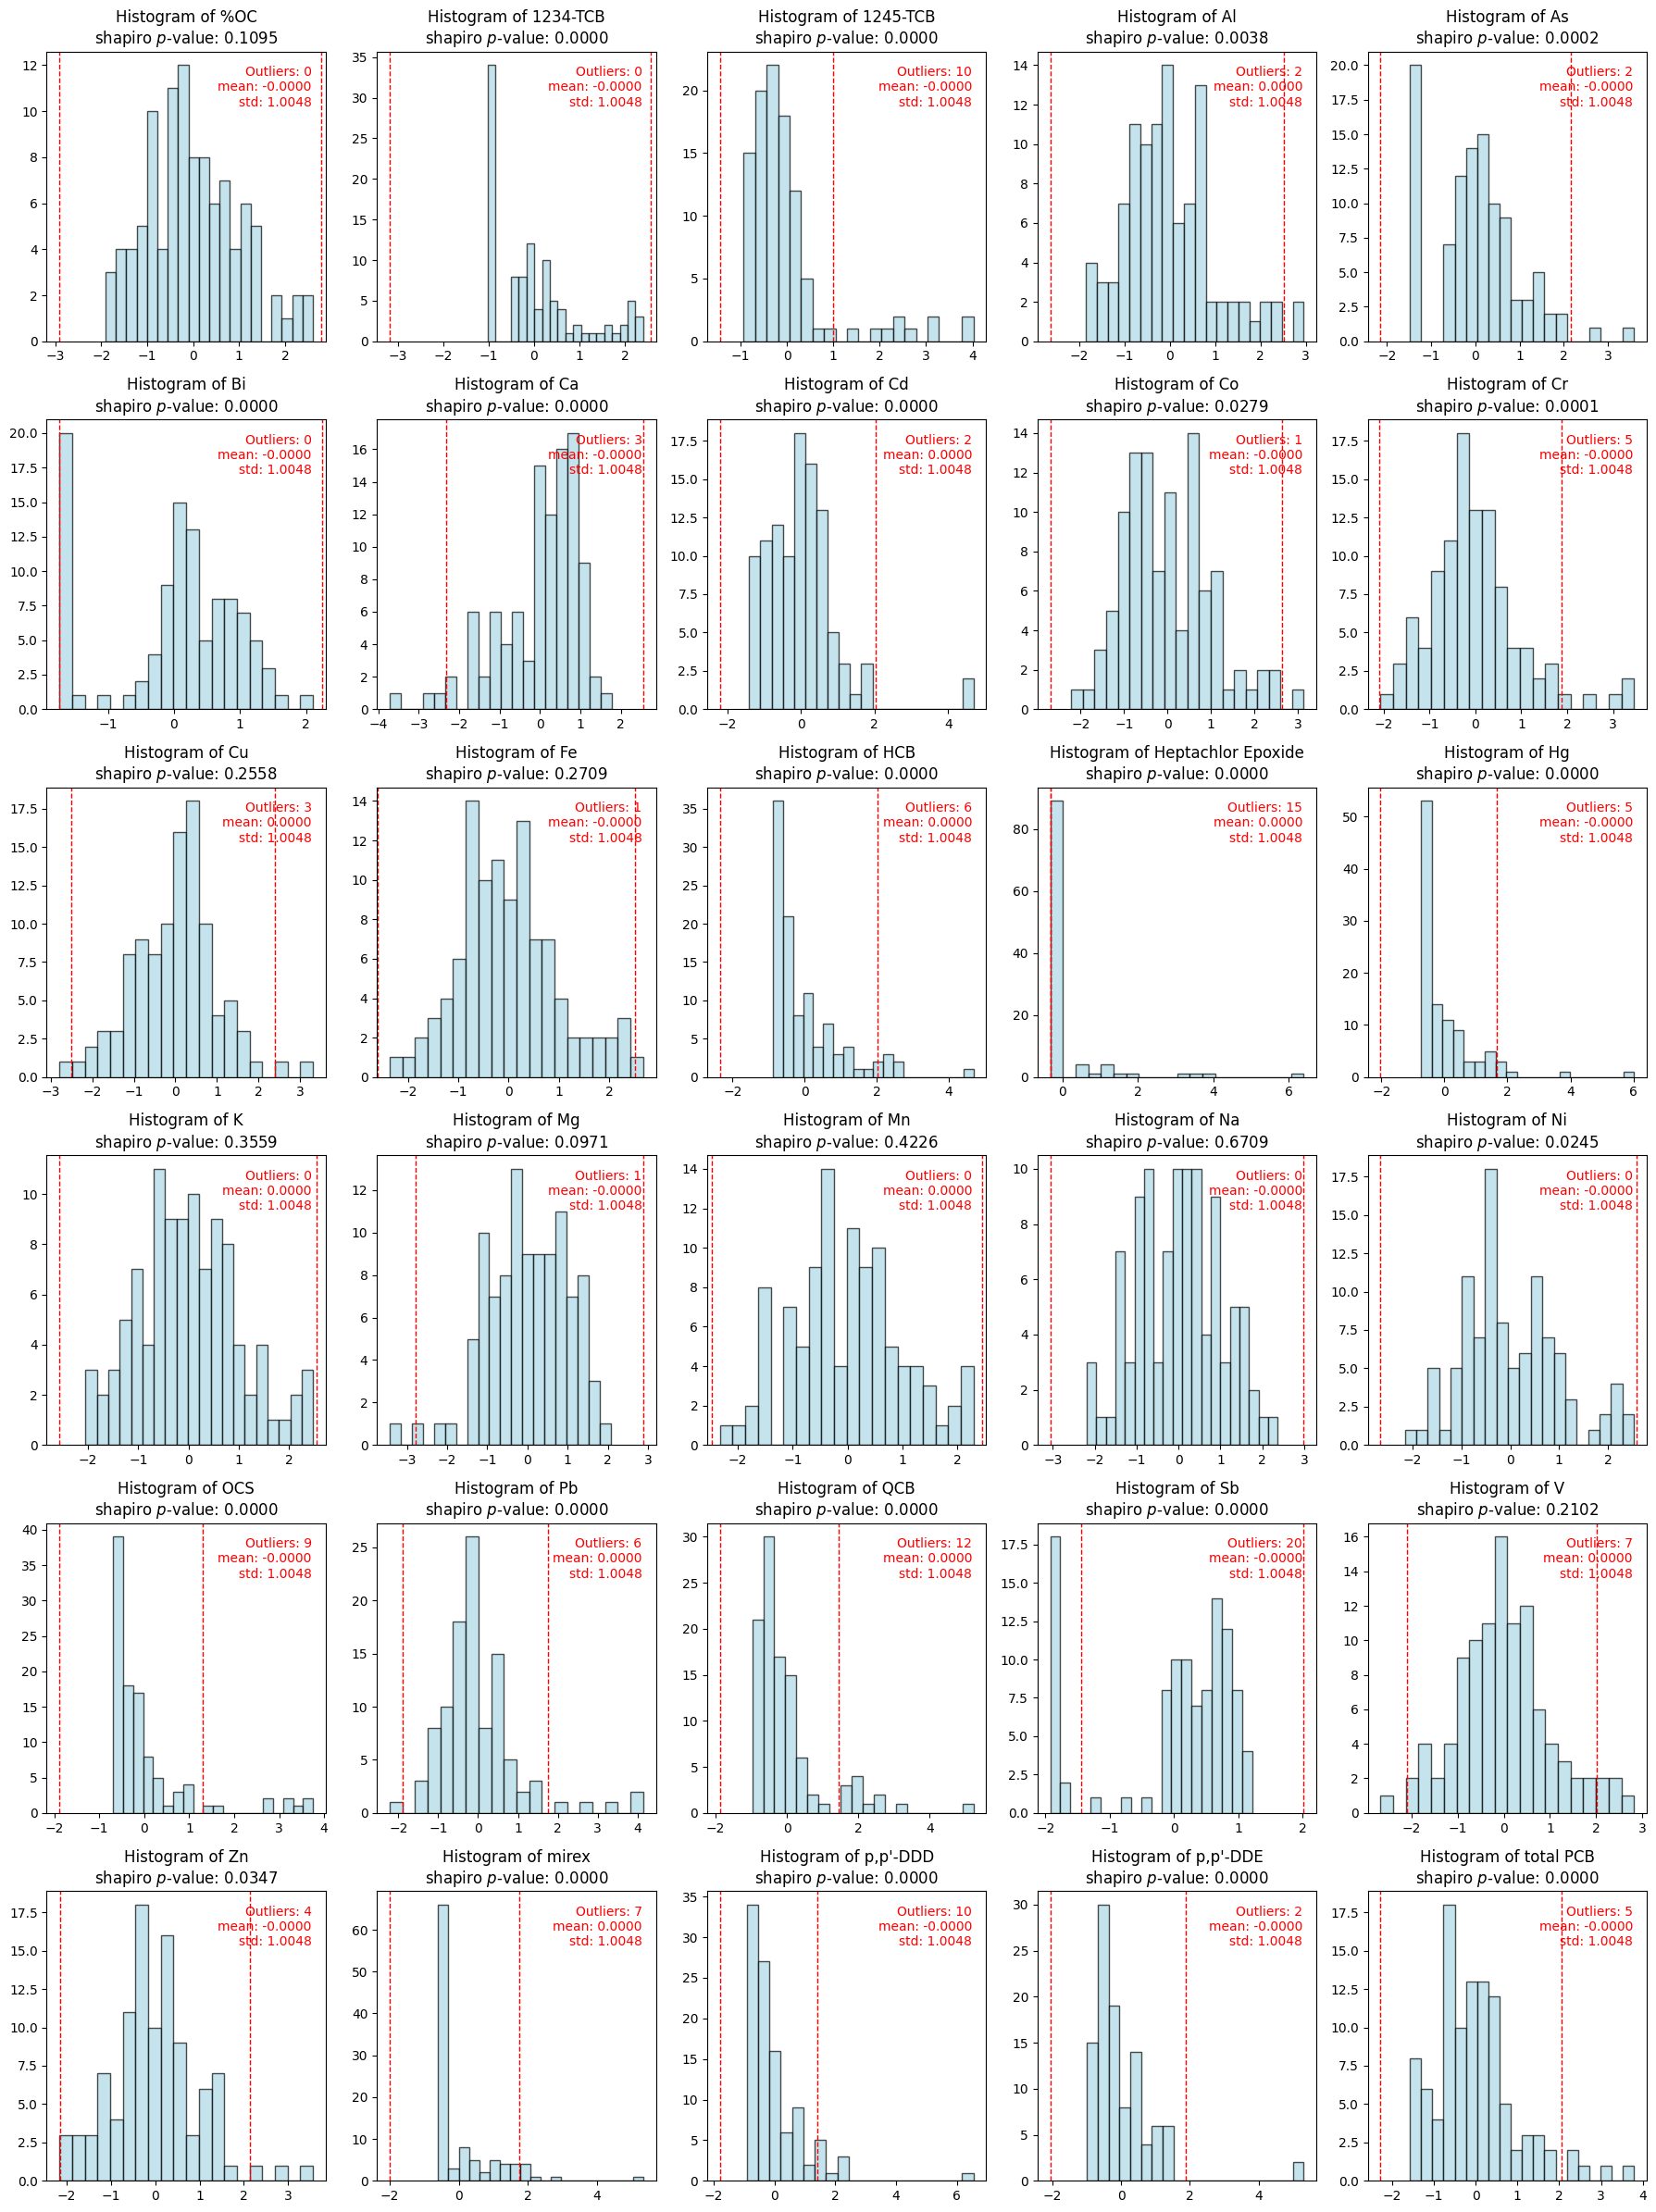

In [202]:
# visualize the histograms and shapiro-wilk test p-values for the z-scored log-transformed chemical features
plot_histograms_with_shapiro(z_score_log_pollution)

In [203]:
# define the function to compute clustered correlation matrix with highlighted cells
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import leaves_list
def compute_clustered_correlation(df, title="Clustered Correlation Matrix"):
    """
    Compute and display correlation matrix with hierarchical clustering ordering.
    
    Parameters:
    df: pandas DataFrame - the dataframe to compute correlations for
    title: str - title for the correlation matrix display
    
    Returns:
    clustered_styled_corr: pandas Styler object - styled correlation matrix
    """
    # Compute correlation matrix
    corr_matrix = df.corr()
    
    # Convert correlation matrix to distance matrix
    distance_matrix = 1 - corr_matrix.abs()
    
    # Perform hierarchical clustering
    linkage_matrix = linkage(squareform(distance_matrix), method='average')
    
    # Get the order of variables from clustering
    cluster_order = leaves_list(linkage_matrix)
    ordered_columns = corr_matrix.columns[cluster_order]
    
    # Reorder the correlation matrix
    clustered_corr = corr_matrix.loc[ordered_columns, ordered_columns]
    
    # Style the reordered correlation matrix
    clustered_styled_corr = clustered_corr.style.background_gradient(cmap='RdBu_r', vmin=-1, vmax=1)\
        .format(precision=2)\
        .set_caption(title)
    
    return clustered_styled_corr

In [204]:
# Apply the function to z_score_log_pollution data
compute_clustered_correlation(
    z_score_log_pollution, 
    "Clustered Correlation Matrix of Z-Scored Log-Transformed Chemical Features"
)

var,Heptachlor Epoxide,1234-TCB,mirex,"p,p'-DDD","p,p'-DDE",As,Bi,Sb,Ca,Mg,Pb,Cu,Zn,Cr,Ni,Na,%OC,Mn,Fe,V,Co,Al,K,OCS,HCB,1245-TCB,QCB,total PCB,Cd,Hg
var,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Heptachlor Epoxide,1.00,0.01,0.12,0.04,0.18,-0.04,0.13,0.14,-0.03,-0.12,-0.05,-0.22,-0.05,-0.17,-0.16,-0.17,-0.11,-0.17,-0.11,-0.14,-0.16,-0.18,-0.13,-0.08,0.08,-0.00,0.08,0.10,0.15,0.06
1234-TCB,0.01,1.00,0.13,0.12,0.07,0.00,-0.00,-0.10,0.20,0.17,0.18,0.14,0.22,0.20,0.19,0.03,0.21,0.19,0.25,0.22,0.13,0.13,0.15,-0.10,0.10,-0.03,0.00,0.15,0.19,0.06
mirex,0.12,0.13,1.00,0.41,0.50,-0.06,-0.12,-0.12,-0.05,-0.04,0.25,0.13,0.20,0.18,0.11,-0.13,0.09,-0.06,0.04,0.02,0.02,0.03,0.02,-0.18,-0.08,-0.06,-0.09,0.25,0.27,0.32
"p,p'-DDD",0.04,0.12,0.41,1.00,0.70,0.29,-0.33,-0.36,0.02,0.04,0.49,0.42,0.37,0.43,0.38,0.15,0.27,0.24,0.29,0.25,0.26,0.21,0.16,-0.07,-0.05,-0.01,-0.03,0.44,0.30,0.43
"p,p'-DDE",0.18,0.07,0.50,0.70,1.00,0.16,-0.31,-0.28,-0.11,-0.10,0.34,0.24,0.23,0.31,0.23,-0.02,0.11,0.12,0.19,0.18,0.16,0.13,0.07,-0.26,-0.20,-0.21,-0.19,0.26,0.16,0.20
As,-0.04,0.00,-0.06,0.29,0.16,1.00,-0.44,-0.51,0.09,0.14,0.41,0.55,0.40,0.42,0.48,0.24,0.34,0.51,0.51,0.56,0.49,0.42,0.32,0.01,-0.09,0.03,-0.04,0.20,0.01,0.07
Bi,0.13,-0.00,-0.12,-0.33,-0.31,-0.44,1.00,0.91,0.21,0.18,-0.42,-0.47,-0.33,-0.45,-0.37,-0.09,-0.22,-0.19,-0.43,-0.30,-0.27,-0.27,-0.11,0.12,0.19,0.14,0.18,-0.18,0.17,0.07
Sb,0.14,-0.10,-0.12,-0.36,-0.28,-0.51,0.91,1.00,-0.03,-0.06,-0.53,-0.59,-0.54,-0.62,-0.60,-0.35,-0.45,-0.48,-0.70,-0.54,-0.54,-0.52,-0.38,0.04,0.05,-0.00,0.04,-0.32,0.04,-0.02
Ca,-0.03,0.20,-0.05,0.02,-0.11,0.09,0.21,-0.03,1.00,0.87,0.23,0.20,0.39,0.26,0.39,0.64,0.47,0.69,0.39,0.40,0.32,0.41,0.54,0.32,0.37,0.40,0.31,0.30,0.47,0.25


The check on the clustered correlation matrix on the processed chemicals shows that their correlation coefficients
are getting higher and more distinct clusters are formed, which might be beneficial for the PCA analysis.

**It is quick and necessary to prove the transformation and standardization changes the measure of Euclidean distance between objects, and it makes the comparisons between objects more meaningful.**

## PCA on the processed chemical features

Import the standard PCA method and apply it on the processed chemical features

In [205]:
from sklearn.decomposition import PCA

# initialize a PCA model
pca_model = PCA()
# fit the processed chemical features into the PCA model
pca_model.fit(z_score_log_pollution)
# return the principal components to a df with variable names
pca_components = pd.DataFrame(np.transpose(pca_model.components_),
                              index=z_score_log_pollution.columns,
                              columns=[f"PC{i+1}" for i in range(pca_model.n_components_)])
pca_components.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
var,,,,,,,,,,,,,,,,,,,,,
%OC,0.239773,0.010238,-0.061939,0.126651,0.001672,-0.027429,-0.043212,-0.143877,-0.047021,0.252946,...,0.080635,0.132884,-0.199651,0.225346,0.019315,0.092231,0.038136,0.067695,0.027766,0.040224
1234-TCB,0.061506,-0.014558,0.049264,0.224352,0.114378,0.792356,-0.318099,0.013653,0.312009,-0.087385,...,-0.014001,-0.069915,0.020670,-0.012090,0.020887,0.010191,-0.013409,0.014066,-0.008096,-0.006651
1245-TCB,0.104572,0.357173,0.092418,-0.237625,0.022310,-0.031129,-0.052967,-0.039634,0.026048,0.171242,...,-0.393221,0.020641,-0.037339,-0.057488,-0.184311,0.033243,0.038866,0.009952,-0.017315,-0.050577
Al,0.249239,-0.029347,-0.188980,0.039918,0.170324,-0.119285,-0.092591,-0.201866,-0.019071,0.007276,...,-0.102724,-0.122608,-0.084999,-0.248869,-0.041130,-0.040549,-0.305595,-0.102259,-0.366914,0.640302
As,0.142363,-0.151872,-0.070814,-0.206648,0.089435,-0.045172,0.317087,0.306928,0.566537,0.316038,...,0.036712,-0.027091,-0.091234,-0.148256,0.149184,-0.053527,-0.117084,-0.032483,0.074731,-0.000170


Check the accumulated explained variance ratio to decide how many PCs to keep.


Cumulative explained variance ratio: [0.41600611 0.56318139 0.6603651  0.72440203 0.76074748 0.79479955
 0.82638395 0.85553327 0.879195   0.89969242 0.91564405 0.92812908
 0.93936346 0.94846622 0.9568461  0.9641036  0.97038172 0.97574718
 0.98068706 0.9844273  0.98773971 0.99066095 0.99312554 0.99523365
 0.9968515  0.99811936 0.99877644 0.99935526 0.99973953 1.        ]


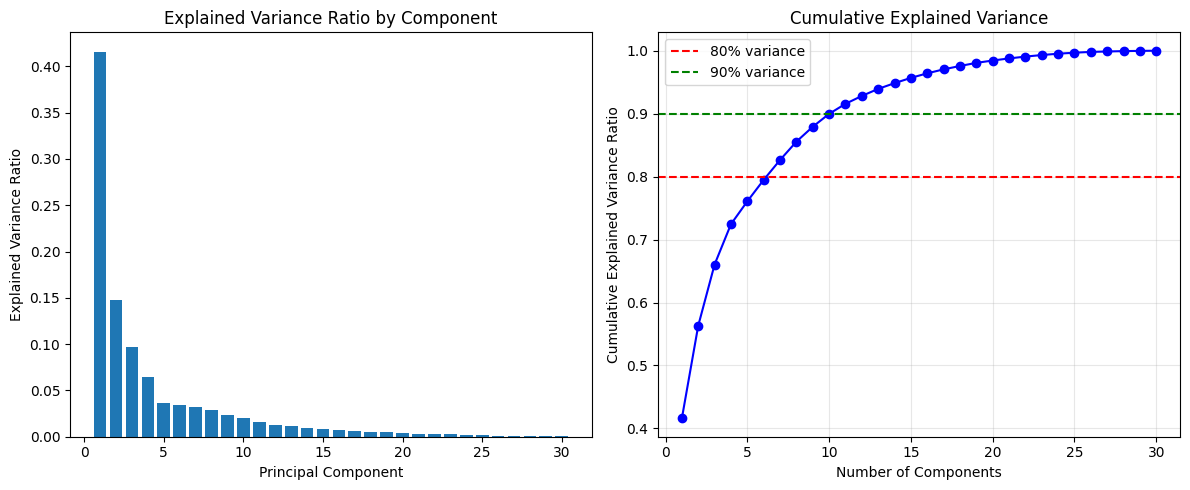

In [206]:
# print and visualize the explained variance ratio for each component
print(f"\nCumulative explained variance ratio: {pca_model.explained_variance_ratio_.cumsum()}")

# visualize the explained variance
plt.figure(figsize=(12, 5))

# subplot 1: explained variance ratio
plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca_model.explained_variance_ratio_) + 1), 
    pca_model.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Component')

# subplot 2: cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca_model.explained_variance_ratio_) + 1), 
     pca_model.explained_variance_ratio_.cumsum(), 'bo-')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% variance')
plt.axhline(y=0.9, color='g', linestyle='--', label='90% variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


After the check, keep the first 7 principal components that explain over 80\% of the variance.

In [207]:
# cut off the PCs dataframe at the 6th principal component, update in place
pca_components = pca_components.iloc[:, :6]

## HCPC: Hierarchical Clustering on Principal Components

The linearly correlated chemicals are easier to be carried with higher loadings on the same principal components.
To make this searching for correlated chemicals across multiple PCs easier, **we can make hierarchical clusters of the chemicals in the PC space.**

In [208]:
# literal chemical categorization for distinguishing pollution types in plots

# Define chemical categories based on environmental significance
chemical_categories = {
    # Binding agent
    "%OC": "Binding agent",

    # Earth element (nontoxic)
    "Al": "Earth element (nontoxic)",
    "Ca": "Earth element (nontoxic)",
    "Fe": "Earth element (nontoxic)",
    "K": "Earth element (nontoxic)",
    "Mg": "Earth element (nontoxic)",
    "Na": "Earth element (nontoxic)",

    # Hydrocarbon pollutant
    "1234-TCB": "Hydrocarbon pollutant",
    "1245-TCB": "Hydrocarbon pollutant",
    "HCB": "Hydrocarbon pollutant",
    "OCS": "Hydrocarbon pollutant",
    "QCB": "Hydrocarbon pollutant",

    # organochlorine pesticide
    "Heptachlor Epoxide": "organochlorine pesticide",
    "mirex": "organochlorine pesticide",
    "p,p'-DDD": "organochlorine pesticide",
    "p,p'-DDE": "organochlorine pesticide",

    # Sum of all PCBs
    "total PCB": "Sum of all PCBs",

    # Trace Metal (pollutant)
    "As": "Trace Metal (pollutant)",
    "Bi": "Trace Metal (pollutant)",
    "Cd": "Trace Metal (pollutant)",
    "Co": "Trace Metal (pollutant)",
    "Cr": "Trace Metal (pollutant)",
    "Cu": "Trace Metal (pollutant)",
    "Hg": "Trace Metal (pollutant)",
    "Mn": "Trace Metal (pollutant)",
    "Ni": "Trace Metal (pollutant)",
    "Pb": "Trace Metal (pollutant)",
    "Sb": "Trace Metal (pollutant)",
    "V": "Trace Metal (pollutant)",
    "Zn": "Trace Metal (pollutant)",
}

# Create color mapping for categories using a qualitative colormap
import matplotlib.pyplot as plt
import numpy as np

categories = sorted(list(set(chemical_categories.values())))
colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))
category_colors = dict(zip(categories, colors))

print("Chemical Categories Defined:")
for i, (category, color) in enumerate(category_colors.items()):
    chemicals = [chem for chem, cat in chemical_categories.items() if cat == category]
    print(f"\n{i+1}. {category} ({len(chemicals)} chemicals):")
    for chem in chemicals:
        print(f"   • {chem}")

Chemical Categories Defined:

1. Binding agent (1 chemicals):
   • %OC

2. Earth element (nontoxic) (6 chemicals):
   • Al
   • Ca
   • Fe
   • K
   • Mg
   • Na

3. Hydrocarbon pollutant (5 chemicals):
   • 1234-TCB
   • 1245-TCB
   • HCB
   • OCS
   • QCB

4. Sum of all PCBs (1 chemicals):
   • total PCB

5. Trace Metal (pollutant) (13 chemicals):
   • As
   • Bi
   • Cd
   • Co
   • Cr
   • Cu
   • Hg
   • Mn
   • Ni
   • Pb
   • Sb
   • V
   • Zn

6. organochlorine pesticide (4 chemicals):
   • Heptachlor Epoxide
   • mirex
   • p,p'-DDD
   • p,p'-DDE


In [209]:
# Hierarchical Clustering on chemicals and Ridge Plot of Pc loadings across chemicals

from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list
from scipy.spatial.distance import pdist
from matplotlib.patches import Patch

def create_ridge_plot(pca_components, figsize=(16, 10)):
    """
    Create a ridge plot of PC loadings with hierarchically clustered variable order.
    
    Parameters:
    -----------
    pca_components : pd.DataFrame
        PCA loadings matrix (variables × components)
    figsize : tuple
        Figure size (width, height)
    
    Returns:
    --------
    fig, ax : matplotlib figure and axis objects
    clustered_variable_names : list
        Variable names in clustered order
    """
    
    # Step 1: Perform hierarchical clustering
    distance_matrix = pdist(pca_components.values, metric='euclidean')
    linkage_matrix = linkage(distance_matrix, method='ward')
    clustered_order = leaves_list(linkage_matrix)
    clustered_variable_names = [pca_components.index[i] for i in clustered_order]
    
    # Step 2: Set up the ridge plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Ridge plot parameters
    n_pcs = pca_components.shape[1]
    ridge_height = 0.8
    ridge_spacing = 1.0
    baseline_offset = 0.1
    
    # Color scheme: blue gradient
    colors = plt.cm.Blues(np.linspace(0.3, 0.9, n_pcs))
    
    # Reorder components according to clustering
    pca_components_clustered = pca_components.reindex(clustered_variable_names)
    
    # Step 3: Create ridge plot for each PC
    for i, pc in enumerate(pca_components_clustered.columns):
        loadings = pca_components_clustered[pc].values
        abs_loadings = np.abs(loadings)
        normalized_loadings = (abs_loadings / abs_loadings.max()) * ridge_height
        
        y_baseline = i * ridge_spacing
        x_positions = np.arange(len(clustered_variable_names))
        
        # Draw bars for each variable
        for j, (x_pos, loading, norm_loading) in enumerate(zip(x_positions, loadings, normalized_loadings)):
            y_bottom = y_baseline + baseline_offset
            y_top = y_bottom + norm_loading
            
            # Style positive and negative loadings differently
            if loading >= 0:
                ax.fill_between([x_pos - 0.4, x_pos + 0.4], [y_bottom, y_bottom], [y_top, y_top], 
                               color=colors[i], alpha=0.8, edgecolor='white', linewidth=0.5)
            else:
                ax.fill_between([x_pos - 0.4, x_pos + 0.4], [y_bottom, y_bottom], [y_top, y_top], 
                               color=colors[i], alpha=0.6, edgecolor='white', linewidth=0.5, hatch='///')
        
        # Add baseline and PC label
        ax.axhline(y=y_baseline + baseline_offset, color='lightgray', linestyle='-', linewidth=0.5, alpha=0.7)
        ax.text(-2, y_baseline + baseline_offset + ridge_height/2, pc, 
                fontsize=12, fontweight='bold', ha='right', va='center')
    
    # Step 4: Style the plot
    ax.set_xlim(-3, len(clustered_variable_names))
    ax.set_ylim(-0.2, n_pcs * ridge_spacing + 0.5)
    ax.set_xticks(range(len(clustered_variable_names)))
    ax.set_xticklabels(clustered_variable_names, rotation=45, ha='right', fontsize=10)
    ax.set_yticks([])
    
    ax.set_title('PC Loadings Ridge Plot\n(Variables Ordered by Hierarchical Clustering)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Chemical Variables (Clustered Order)', fontsize=12)
    ax.grid(True, alpha=0.3, axis='x')
    
    # Remove spines
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)
    
    # Add legend
    legend_elements = [
        Patch(facecolor=colors[0], alpha=0.8, label='Positive loadings'),
        Patch(facecolor=colors[0], alpha=0.6, hatch='///', label='Negative loadings')
    ]
    ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1, 1))
    
    plt.tight_layout()
    return fig, ax, clustered_variable_names

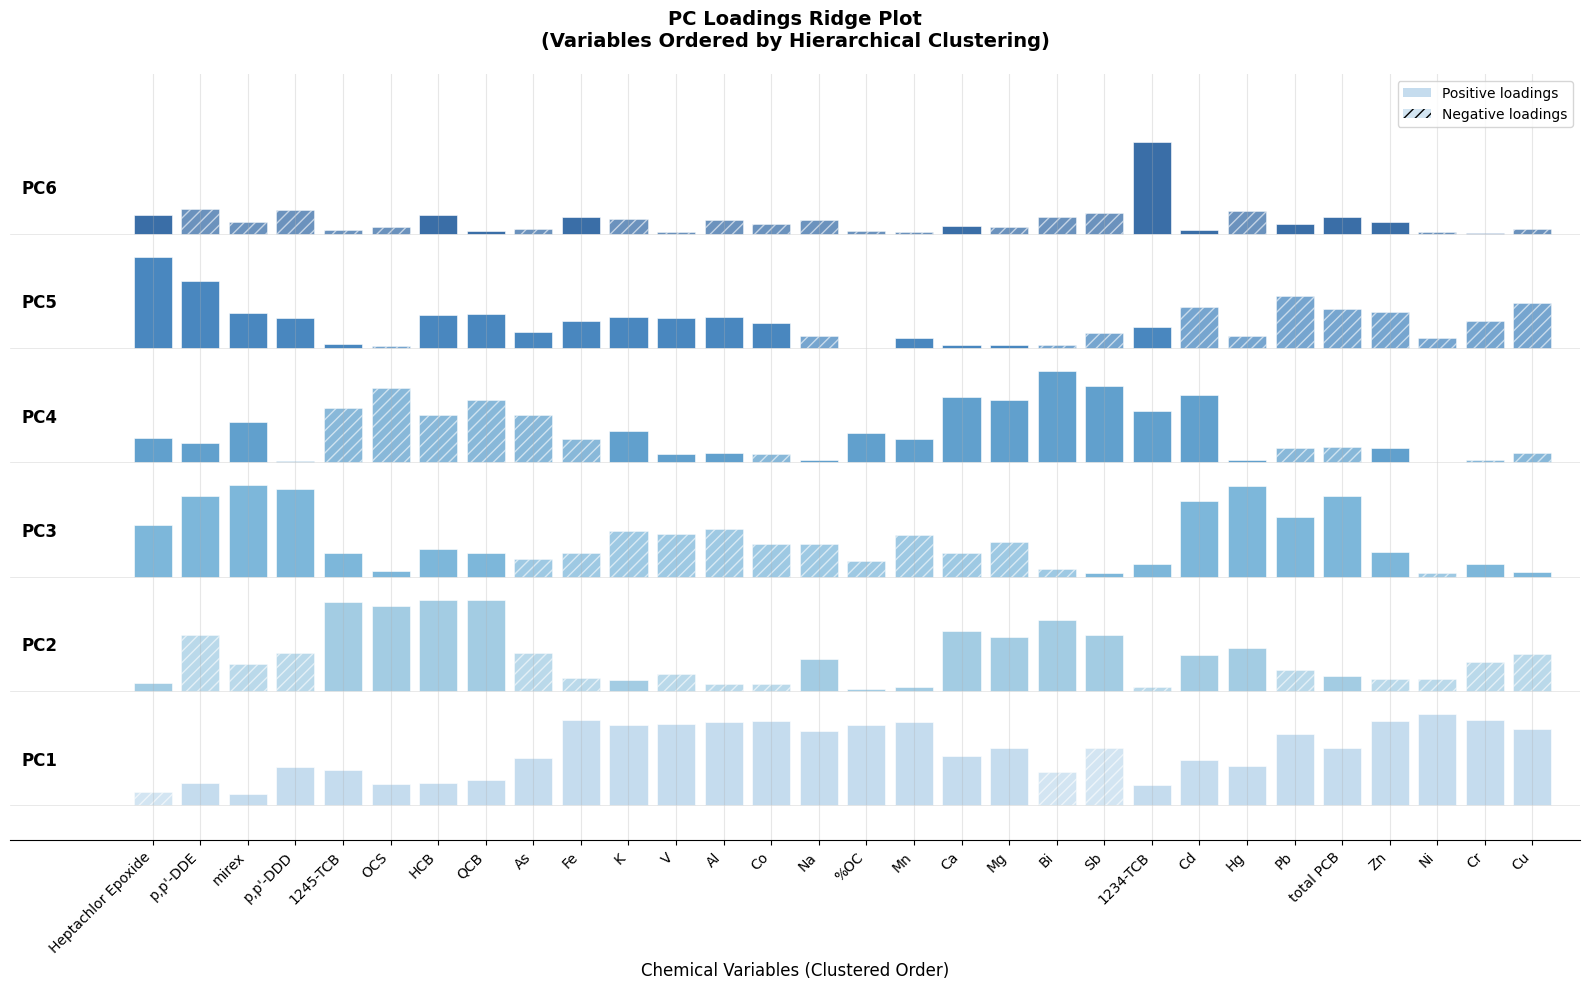

In [210]:
# create the ridge plot for the clustered chemicals across the PCs
fig, ax, clustered_vars = create_ridge_plot(pca_components)
plt.show()

In [211]:
# 2D scatter plots of PC loadings of chemicals with categorical colors

def create_loadings_scatter_plots(pca_components, pca_model, chemical_categories, category_colors, 
                                  figsize=(20, 6), dpi=300):
    """
    Create 2D scatter plots of variable loadings colored by chemical category.
    
    Parameters:
    -----------
    pca_components : pd.DataFrame
        PCA loadings matrix
    pca_model : sklearn PCA object
        Fitted PCA model for variance ratios
    chemical_categories : dict
        Mapping of chemicals to categories
    category_colors : dict
        Mapping of categories to colors
    figsize : tuple
        Figure size
    dpi : int
        Resolution for the plots
        
    Returns:
    --------
    fig, axes : matplotlib figure and axes objects
    """
    
    fig, axes = plt.subplots(1, 3, figsize=figsize, dpi=dpi)
    
    # Plot configurations
    plot_configs = [
        ('PC1', 'PC2', 0, 1, axes[0]),
        ('PC1', 'PC3', 0, 2, axes[1]), 
        ('PC2', 'PC3', 1, 2, axes[2])
    ]
    
    # First, determine the global min/max for all PCs to ensure equal axis limits
    all_loadings = pca_components[['PC1', 'PC2', 'PC3']].values.flatten()
    global_min = np.min(all_loadings)
    global_max = np.max(all_loadings)
    
    # Add some padding to the limits
    padding = 0.1 * (global_max - global_min)
    axis_min = global_min - padding
    axis_max = global_max + padding
    
    # Create scatter plots
    for pc_x, pc_y, idx_x, idx_y, ax in plot_configs:
        # Plot each variable as a point
        for i, var in enumerate(pca_components.index):
            category = chemical_categories.get(var, 'Other')
            color = category_colors.get(category, 'gray')
            
            x_coord = pca_components.iloc[i][pc_x]
            y_coord = pca_components.iloc[i][pc_y]
            
            ax.scatter(x_coord, y_coord, c=[color], alpha=0.8, s=80, 
                      edgecolors='black', linewidth=0.5, zorder=3)
            
            # Add variable labels with improved positioning
            ax.annotate(var, (x_coord, y_coord), fontsize=8, ha='center', va='bottom',
                       xytext=(0, 5), textcoords='offset points', zorder=4)
        
        # Set equal axis limits for all plots
        ax.set_xlim(axis_min, axis_max)
        ax.set_ylim(axis_min, axis_max)
        
        # Styling
        var_x = pca_model.explained_variance_ratio_[idx_x]
        var_y = pca_model.explained_variance_ratio_[idx_y]
        
        ax.set_xlabel(f'{pc_x} ({var_x:.1%} variance)', fontsize=12)
        ax.set_ylabel(f'{pc_y} ({var_y:.1%} variance)', fontsize=12)
        ax.set_title(f'Variable Loadings: {pc_x} vs {pc_y}\n(Colored by Chemical Category)', 
                    fontsize=12, fontweight='bold')
        
        # Add reference lines and grid
        ax.grid(True, alpha=0.3, zorder=1)
        ax.axhline(y=0, color='k', linestyle='--', alpha=0.5, zorder=2)
        ax.axvline(x=0, color='k', linestyle='--', alpha=0.5, zorder=2)
        
        # Set equal aspect ratio for better interpretation
        ax.set_aspect('equal', adjustable='box')
    
    # Create unified legend
    legend_elements = [Patch(facecolor=color, edgecolor='black', label=category, alpha=0.8) 
                      for category, color in sorted(category_colors.items())]
    
    fig.legend(handles=legend_elements, loc='center', bbox_to_anchor=(0.5, -0.05), 
              ncol=min(4, len(categories)), fontsize=10, frameon=True, fancybox=True)
    
    plt.tight_layout()
    # plt.subplots_adjust(bottom=0.15)  # Make room for legend
    
    return fig, axes

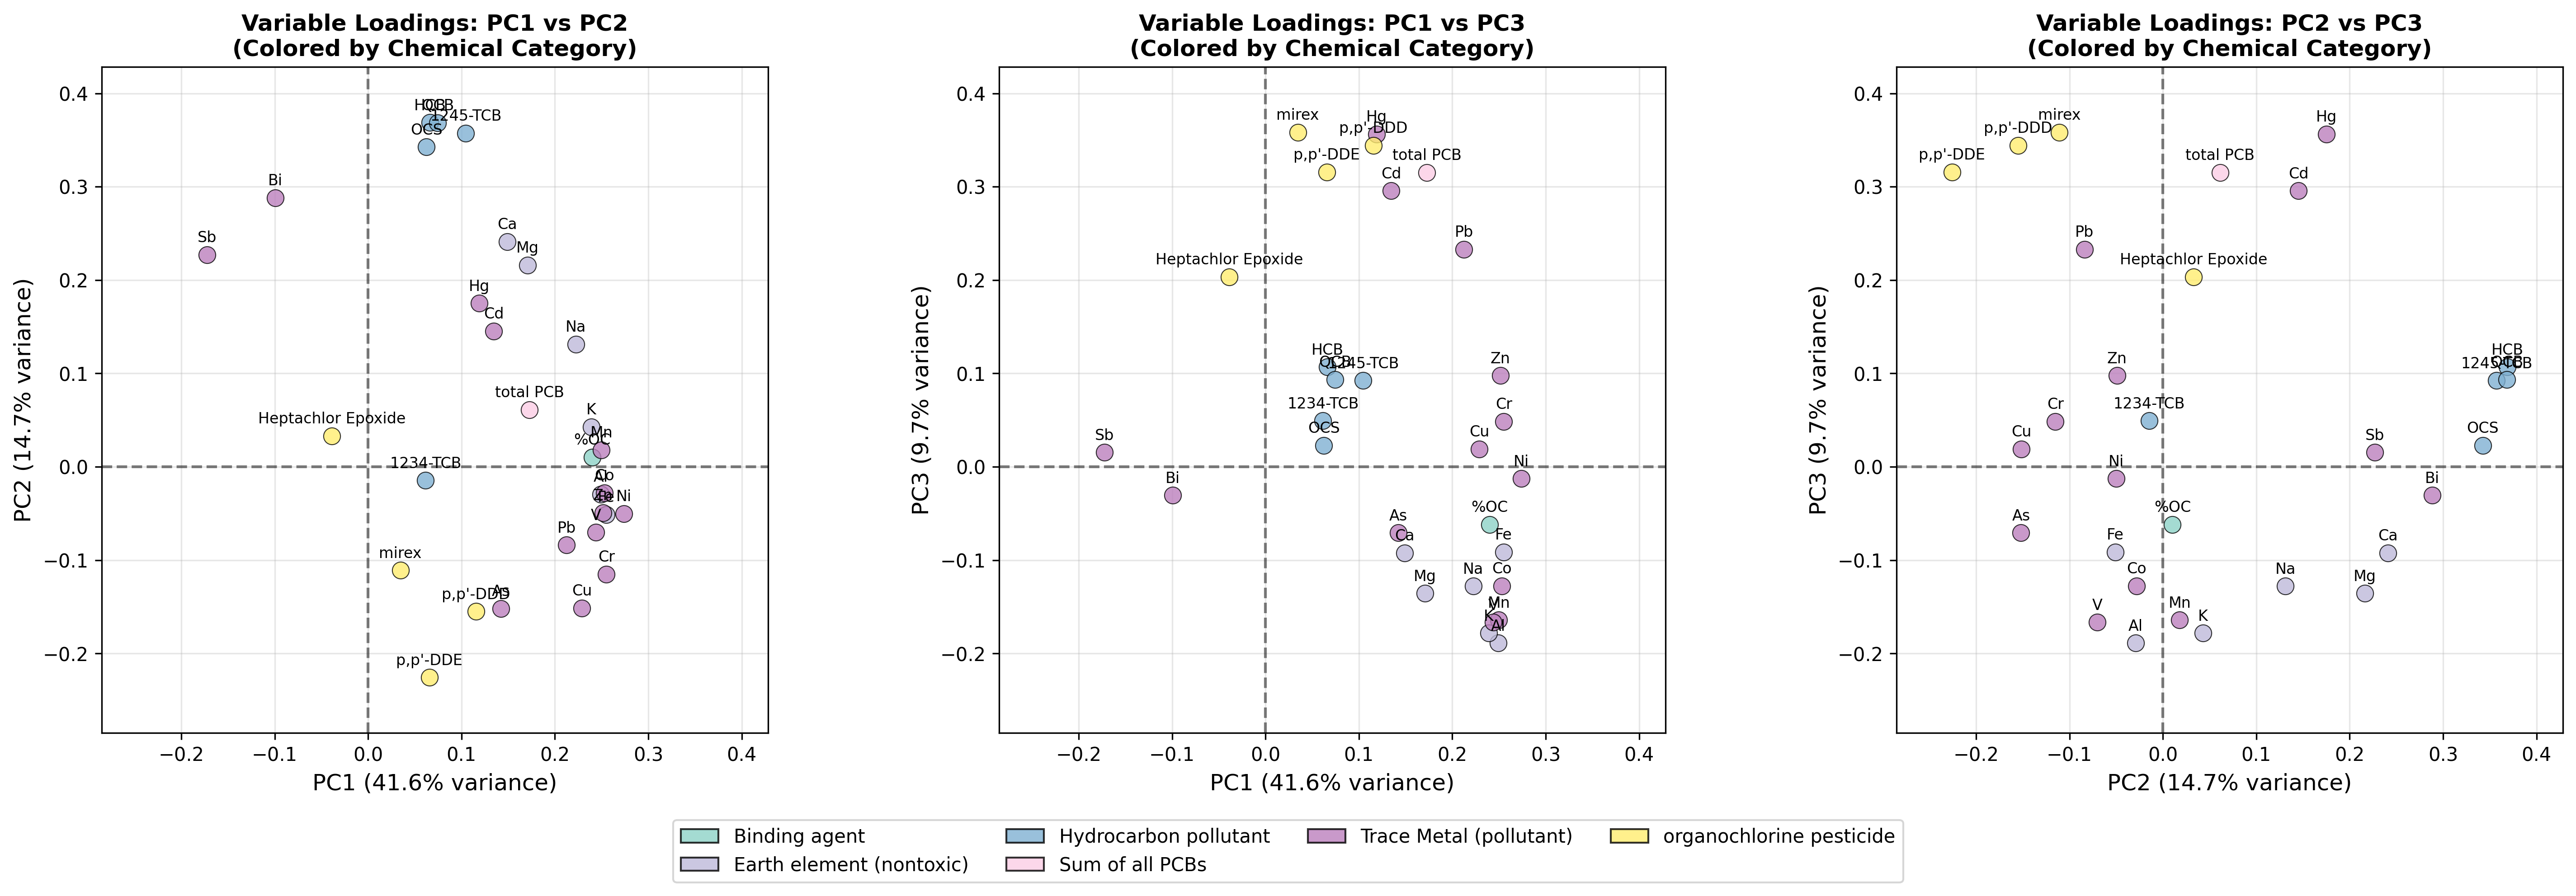


Total chemicals categorized: 30
Total categories: 6


In [212]:
# Create the scatter plots of raw chemicals in the top 3 PCs space
fig, axes = create_loadings_scatter_plots(pca_components, pca_model, chemical_categories, category_colors)
plt.show()
    
print(f"\nTotal chemicals categorized: {len(chemical_categories)}")
print(f"Total categories: {len(categories)}")

The clusters of raw chemicals in the PC space revealed which chemicals are driven by similar sources or processes (PCs), 
it helps interpret the PCs with respect to the carried checmicals.

## Validate the PC scores for chemicals and reveal potential spatial patterns

Loadings indicate how the chemicals contribute to the PCs. **Rotate the chemical matrix by the (orthonormal) loading matrix**, it gives the orthogonal PC score matrix for the sites.

Each PC score represents an implicit stressor source/process that drives a group of correlated chemicals and affects the contamination level across sites.

In [213]:
# compute the raw PC scores for all sites using the trained PCA model
pc_scores = pca_model.transform(z_score_log_pollution) # all PCs were kept in the model
# only keep the first k(6) PCs as discussed
k = 6
pc_scores = pd.DataFrame(pc_scores[:, :k], 
                         columns = [f"PC{i+1}" for i in range(k)],
                         index = z_score_log_pollution.index)
pc_scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6
StationID,,,,,,
A10,-0.865353,-0.351552,-0.347025,0.962712,-0.976952,1.810693
A23,1.426356,0.545505,0.032399,0.938775,0.072763,1.112929
A27,4.266781,-2.181065,-1.050047,-0.168917,0.994685,0.528165
A28,3.386856,-2.315846,-1.692202,-0.780181,1.010746,-0.086816
A29,7.270468,-2.180146,-1.571545,-0.315124,1.217754,-0.112678


In [214]:
# Ridge-style density plot function for PC scores vs chemical concentrations
def ridge_plot_pc_chemical(pc_index, chemical, fig, ax, n_bins=3):
    """
    Create ridge-style density plots showing chemical distribution across PC score bins.
    
    Parameters:
    -----------
    pc_index : str
        PC name (e.g., 'PC1', 'PC2')
    chemical : str
        Chemical name
    fig : matplotlib figure
        Figure object to plot on
    ax : matplotlib axis
        Axis object to plot on
    n_bins : int
        Number of bins to divide PC scores into (default=3)
    
    Returns:
    --------
    None (plots on provided axis)
    """
    from scipy import stats
    
    pc_vector = pc_scores[pc_index]
    # Define bins based on the specified PC vector
    bin_labels = ['Low', 'Medium', 'High'] if n_bins == 3 else [f'Bin{i+1}' for i in range(n_bins)]
    bins = pd.qcut(pc_vector, q=n_bins, labels=bin_labels)
    
    # Colors for different bins (light to dark: Low=light, High=dark)
    colors = plt.cm.Blues(np.linspace(0.4, 0.9, n_bins))
    
    # Perform ANOVA test to check for significant differences between groups
    from scipy.stats import f_oneway
    groups_data = []
    for bin_label in bin_labels:
        bin_indices = bins[bins == bin_label].index
        chemical_data = z_score_log_pollution.loc[bin_indices, chemical]
        groups_data.append(chemical_data.values)
    
    # Perform one-way ANOVA
    f_stat, p_value = f_oneway(*groups_data)
    
    # Ridge plot parameters
    ridge_height = 0.8
    ridge_spacing = 1.0
    baseline_offset = 0.1
    
    # Get global x-axis limits for consistent scaling
    all_chemical_data = []
    for bin_label in bins.unique():
        bin_indices = bins[bins == bin_label].index
        chemical_data = z_score_log_pollution.loc[bin_indices, chemical]
        all_chemical_data.extend(chemical_data.values)
    
    x_min, x_max = min(all_chemical_data), max(all_chemical_data)
    x_range = x_max - x_min
    x_padding = 0.1 * x_range
    x_plot_min, x_plot_max = x_min - x_padding, x_max + x_padding
    
    # Create ridge plot for each bin (Low at top, High at bottom)
    bin_order = ['Low', 'Medium', 'High'] if n_bins == 3 else [f'Bin{i+1}' for i in range(n_bins)]
    for i, bin_label in enumerate(bin_order):  # Low at top (i=0), High at bottom (i=2)
        bin_idx = i  # Use direct index: Low=0 (lightest), High=2 (darkest)
        
        # Get chemical data for this bin
        bin_indices = bins[bins == bin_label].index
        chemical_data = z_score_log_pollution.loc[bin_indices, chemical]
        
        # Calculate statistics
        mean_val = chemical_data.mean()
        std_val = chemical_data.std()
        
        # Create kernel density estimation
        if len(chemical_data) > 1:
            kde = stats.gaussian_kde(chemical_data)
            x_plot = np.linspace(x_plot_min, x_plot_max, 200)
            density = kde(x_plot)
            
            # Normalize density to ridge height
            density_normalized = (density / density.max()) * ridge_height
        else:
            # Handle case with single data point
            x_plot = np.array([mean_val])
            density_normalized = np.array([ridge_height])
        
        # Calculate y position for this ridge
        y_baseline = i * ridge_spacing + baseline_offset
        y_values = y_baseline + density_normalized
        
        # Fill the area under the curve
        ax.fill_between(x_plot, y_baseline, y_values, 
                       color=colors[bin_idx], alpha=0.7, 
                       edgecolor='white', linewidth=1)
        
        # Add mean line
        ax.axvline(x=mean_val, ymin=(y_baseline)/(n_bins * ridge_spacing + 1), 
                  ymax=(y_baseline + ridge_height)/(n_bins * ridge_spacing + 1),
                  color='red', linestyle='--', linewidth=2, alpha=0.8)
        
        # Add bin label on the left
        ax.text(x_plot_min - 0.05 * x_range, y_baseline + ridge_height/2, 
               f'{bin_label}\n{pc_index}', 
               fontsize=10, fontweight='bold', ha='right', va='center')
        
        # Add statistics text on the right
        stats_text = f'$\\bar{{X}}$={mean_val:.2f}\n$\\hat{{\\sigma}}$={std_val:.2f}\nn={len(chemical_data)}'
        ax.text(x_plot_max + 0.02 * x_range, y_baseline + ridge_height/2, 
               stats_text, fontsize=12, ha='left', va='center',)
        
        # Add baseline
        ax.axhline(y=y_baseline, color='lightgray', linestyle='-', 
                  linewidth=0.5, alpha=0.7, xmin=0.05, xmax=0.95)
    
    # Styling
    ax.set_xlim(x_plot_min - 0.1 * x_range, x_plot_max + 0.15 * x_range)
    ax.set_ylim(-0.2, n_bins * ridge_spacing + 0.3)
    ax.set_xlabel(f'{chemical} (z-scored, log-transformed)', fontsize=11)
    # Format p-value for display
    if p_value < 0.001:
        p_text = "p<0.001"
    else:
        p_text = f"p={p_value:.3f}"
    
    ax.set_title(f'{chemical} Distribution by {pc_index} Levels\nANOVA: {p_text}', 
                fontsize=12, fontweight='bold', pad=15)
    
    # Remove y-axis ticks and labels
    ax.set_yticks([])
    
    # Remove top and right spines
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)
    
    # Add subtle grid
    ax.grid(True, alpha=0.3, axis='x')

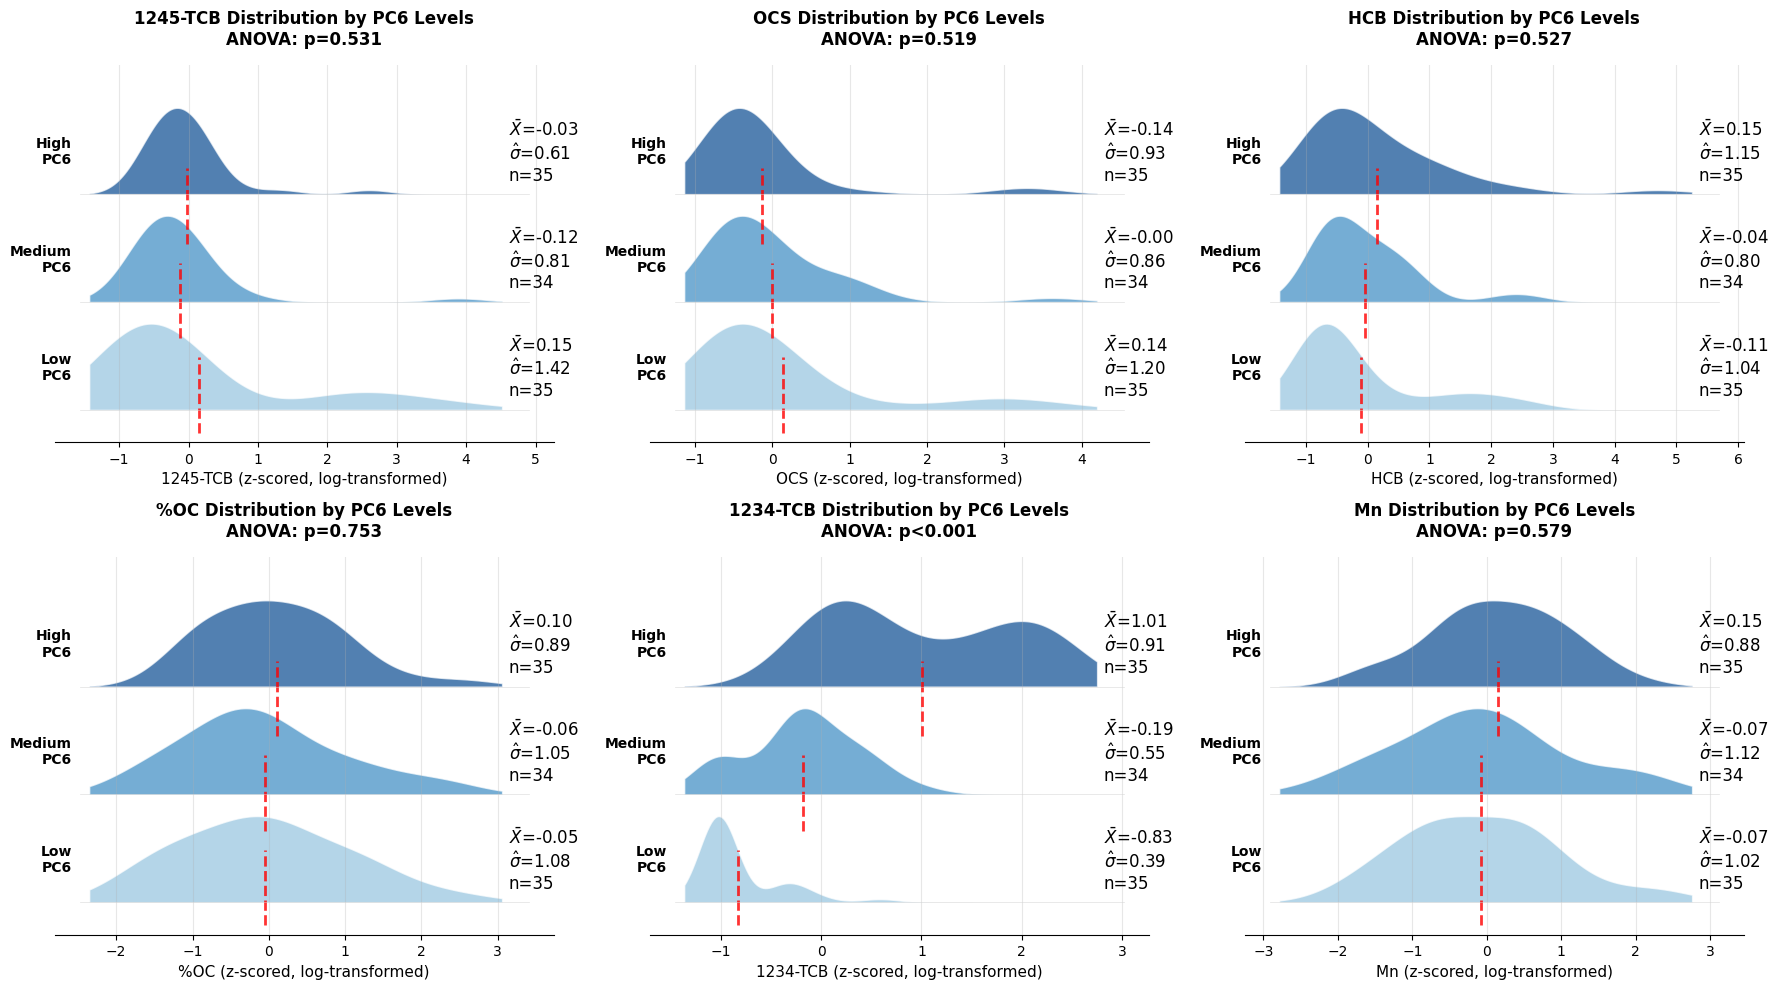

In [215]:
# plot the chemical distribution ridge plot for PC6 vs (1245-TCB, OCS, HCB, Fe, 1234-TCB, Mn)
# Create a figure with 6 subplots for ridge plots of selected chemicals
chemicals_to_plot = ['1245-TCB', 'OCS', 'HCB', '%OC', '1234-TCB', 'Mn']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, chemical in enumerate(chemicals_to_plot):
    ridge_plot_pc_chemical('PC6', chemical, fig, axes[i])

plt.tight_layout()
plt.show()

In [216]:
# plot a specific habitat feature's spatial distribution and boxplot
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

# define a function to read the shp files and quickly plot the lake and river maps
def plot_rivers_lakes(ax = None, annotating = False):
    """Plot the Detroit River with adjacent lakes."""
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.figure
        
    # read the two shape files of the lakes
    lake_stclair = gpd.read_file("../data/maps/lake_stclair/lake_stclair.shp")
    lake_erie = gpd.read_file("../data/maps/lake_erie/lake_erie.shp")
    detroit_river = gpd.read_file("../data/maps/detroit_river_aoc_shapefile/AOC_MI_Detroit_2021.shp")
    stclair_river = gpd.read_file("../data/maps/aoc_mi_stclair_2021/AOC_MI_StClair_2021.shp")
    lake_huron = gpd.read_file("../data/maps/lake_huron/lake_huron.shp")
    
    # plot the Detroit River and the lakes
    lake_stclair.plot(ax=ax, color='lightblue', edgecolor='none', alpha=0.5)
    lake_erie.plot(ax=ax, color='lightblue', edgecolor='none', alpha=0.5)
    lake_huron.plot(ax=ax, color='lightblue', edgecolor='none', alpha=0.5)
    detroit_river.plot(ax=ax, color='lightblue', edgecolor='none')
    stclair_river.plot(ax=ax, color='lightblue', edgecolor='none')
    ax.set_title("The Huron-Erie Corridor")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_ylim(42, 43.1)  # Set y-limits to focus on North America
    ax.set_xlim(-83.3, -82.3)  # Set x-limits to focus on North America
    if annotating:
        ax.text(-83.0, 42.2, 'Detroit River', fontsize=8, color = 'gray', style='italic') 
        ax.text(-82.85, 42.9, 'St. Clair River', fontsize=8, color = 'gray', style='italic')
        ax.text(-82.55, 42.05, 'Lake Erie', fontsize=8, color = 'gray', style='italic')
        ax.text(-83.0, 42.5, 'Lake St. Clair', fontsize=8, color = 'gray', style='italic')
        ax.text(-82.6, 43.05, 'Lake Huron', fontsize=8, color = 'gray', style='italic')
    return fig, ax

def plot_feature_analysis(df, feature_name, lat_col='Latitude', lon_col='Longitude', waterbody_col='Waterbody'):
    """
    Plot a specific habitat feature's spatial distribution and statistical analysis.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the data
    feature_name : str
        Name of the feature column to analyze
    lat_col : str
        Name of the latitude column (default: 'Latitude')
    lon_col : str
        Name of the longitude column (default: 'Longitude')
    waterbody_col : str
        Name of the waterbody column (default: 'Waterbody')
    """
    
    # Create a figure with three subplots: left for map, right side split into two
    fig = plt.figure(figsize=(10, 6), dpi=300)

    # Create subplot layout: left panel takes 1/2 width, right panel split into 2 rows
    ax1 = plt.subplot2grid((2, 2), (0, 0), rowspan=2)  # Map spans full left side (1/2 width)
    ax2 = plt.subplot2grid((2, 2), (0, 1))  # Upper right: ridge plot comparison
    ax3 = plt.subplot2grid((2, 2), (1, 1))  # Lower right: ANOVA test results

    # Left panel: Spatial distribution map
    plot_rivers_lakes(ax=ax1, annotating=True)
    # Normalize the feature values to create relative sizes
    feature_values = df[feature_name]
    normalized_sizes = ((feature_values - feature_values.min()) / 
                       (feature_values.max() - feature_values.min()) * 100 + 5)
    
    sc = ax1.scatter(df[lon_col], df[lat_col], c=df[feature_name], 
                     s=normalized_sizes, cmap='viridis', alpha=0.7)
    ax1.set_title(f"Spatial Distribution of {feature_name}", fontsize=14, fontweight='bold')
    ax1.grid(linestyle='--', alpha=0.5)

    # Add colorbar for the scatter plot
    cbar = plt.colorbar(sc, ax=ax1, shrink=0.8)
    cbar.set_label(feature_name, fontsize=12)

    # Upper right: Ridge plot-style comparison across waterbodies
    waterbodies = df[waterbody_col].unique()

    # Create blue gradient colors
    n_bodies = len(waterbodies)
    colors = plt.cm.Blues(np.linspace(0.3, 0.9, n_bodies))

    # Set up the ridge plot parameters
    ridge_height = 0.8  # Height of each ridge
    ridge_spacing = 1.0  # Vertical spacing between ridges
    baseline_offset = 0.1  # Small offset from baseline

    # Clear the axis and set up for ridge plot
    ax2.clear()

    # Create ridge plot with proper stacking
    for i, wb in enumerate(waterbodies):
        data_wb = df[df[waterbody_col] == wb][feature_name].dropna()
        if len(data_wb) > 1:
            # Create smooth density curve using Gaussian KDE
            kde = gaussian_kde(data_wb)
            
            # Create x values for smooth curve
            x_min, x_max = data_wb.min(), data_wb.max()
            x_range = x_max - x_min
            x_smooth = np.linspace(x_min - 0.1*x_range, x_max + 0.1*x_range, 200)
            
            # Calculate density values
            density = kde(x_smooth)
            
            # Normalize density to ridge height
            normalized_density = (density / density.max()) * ridge_height
            
            # Calculate y position for this ridge (bottom to top)
            y_baseline = i * ridge_spacing
            y_values = y_baseline + normalized_density + baseline_offset
            
            # Create the filled area
            ax2.fill_between(x_smooth, y_baseline + baseline_offset, y_values, 
                            color=colors[i], alpha=0.8, edgecolor='white', linewidth=0.5)
            
            # Add a subtle baseline for each ridge
            ax2.axhline(y=y_baseline + baseline_offset, color='lightgray', 
                       linestyle='-', linewidth=0.5, alpha=0.7)

    # Set up the y-axis
    ax2.set_ylim(-0.2, len(waterbodies) * ridge_spacing + 0.5)
    ax2.set_yticks([i * ridge_spacing + baseline_offset + ridge_height/2 for i in range(len(waterbodies))])
    ax2.set_yticklabels(waterbodies, fontsize=11)

    # Style the plot
    ax2.set_title(f"Overlapping densities ('ridge plot')", fontsize=10, fontweight='bold')
    ax2.set_xlabel(feature_name, fontsize=11)
    ax2.grid(True, alpha=0.3, axis='x')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    # Lower right: ANOVA test results with bar plot
    waterbody_groups = [df[df[waterbody_col] == wb][feature_name].dropna() 
                       for wb in waterbodies]
    f_stat, p_value = f_oneway(*waterbody_groups)

    # Calculate means and standard errors
    means = [group.mean() for group in waterbody_groups]
    std_errors = [group.std() / np.sqrt(len(group)) for group in waterbody_groups]

    # Create bar plot with error bars using the same blue gradient
    bars = ax3.bar(waterbodies, means, yerr=std_errors, 
                   alpha=0.8, color=colors, capsize=5, 
                   error_kw={'linewidth': 2, 'markeredgewidth': 2})

    # Add value labels on bars
    for i, (bar, mean) in enumerate(zip(bars, means)):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + std_errors[i] + height*0.02,
                 f'{mean:.2f}', ha='center', va='bottom', fontweight='bold')

    ax3.set_title(f"ANOVA Test: Mean {feature_name} by Waterbody\nF={f_stat:.3f}, p={p_value:.4f}", 
                  fontsize=10, fontweight='bold')
    ax3.set_ylabel(f"Mean {feature_name} ± SE", fontsize=11)
    ax3.set_xlabel("Waterbody", fontsize=11)
    ax3.grid(True, alpha=0.3, axis='y')
    ax3.spines['top'].set_visible(False)
    ax3.spines['right'].set_visible(False)
    ax3.spines['left'].set_visible(False)

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.3, hspace=0.4)

    plt.show()
    
    return fig, f_stat, p_value

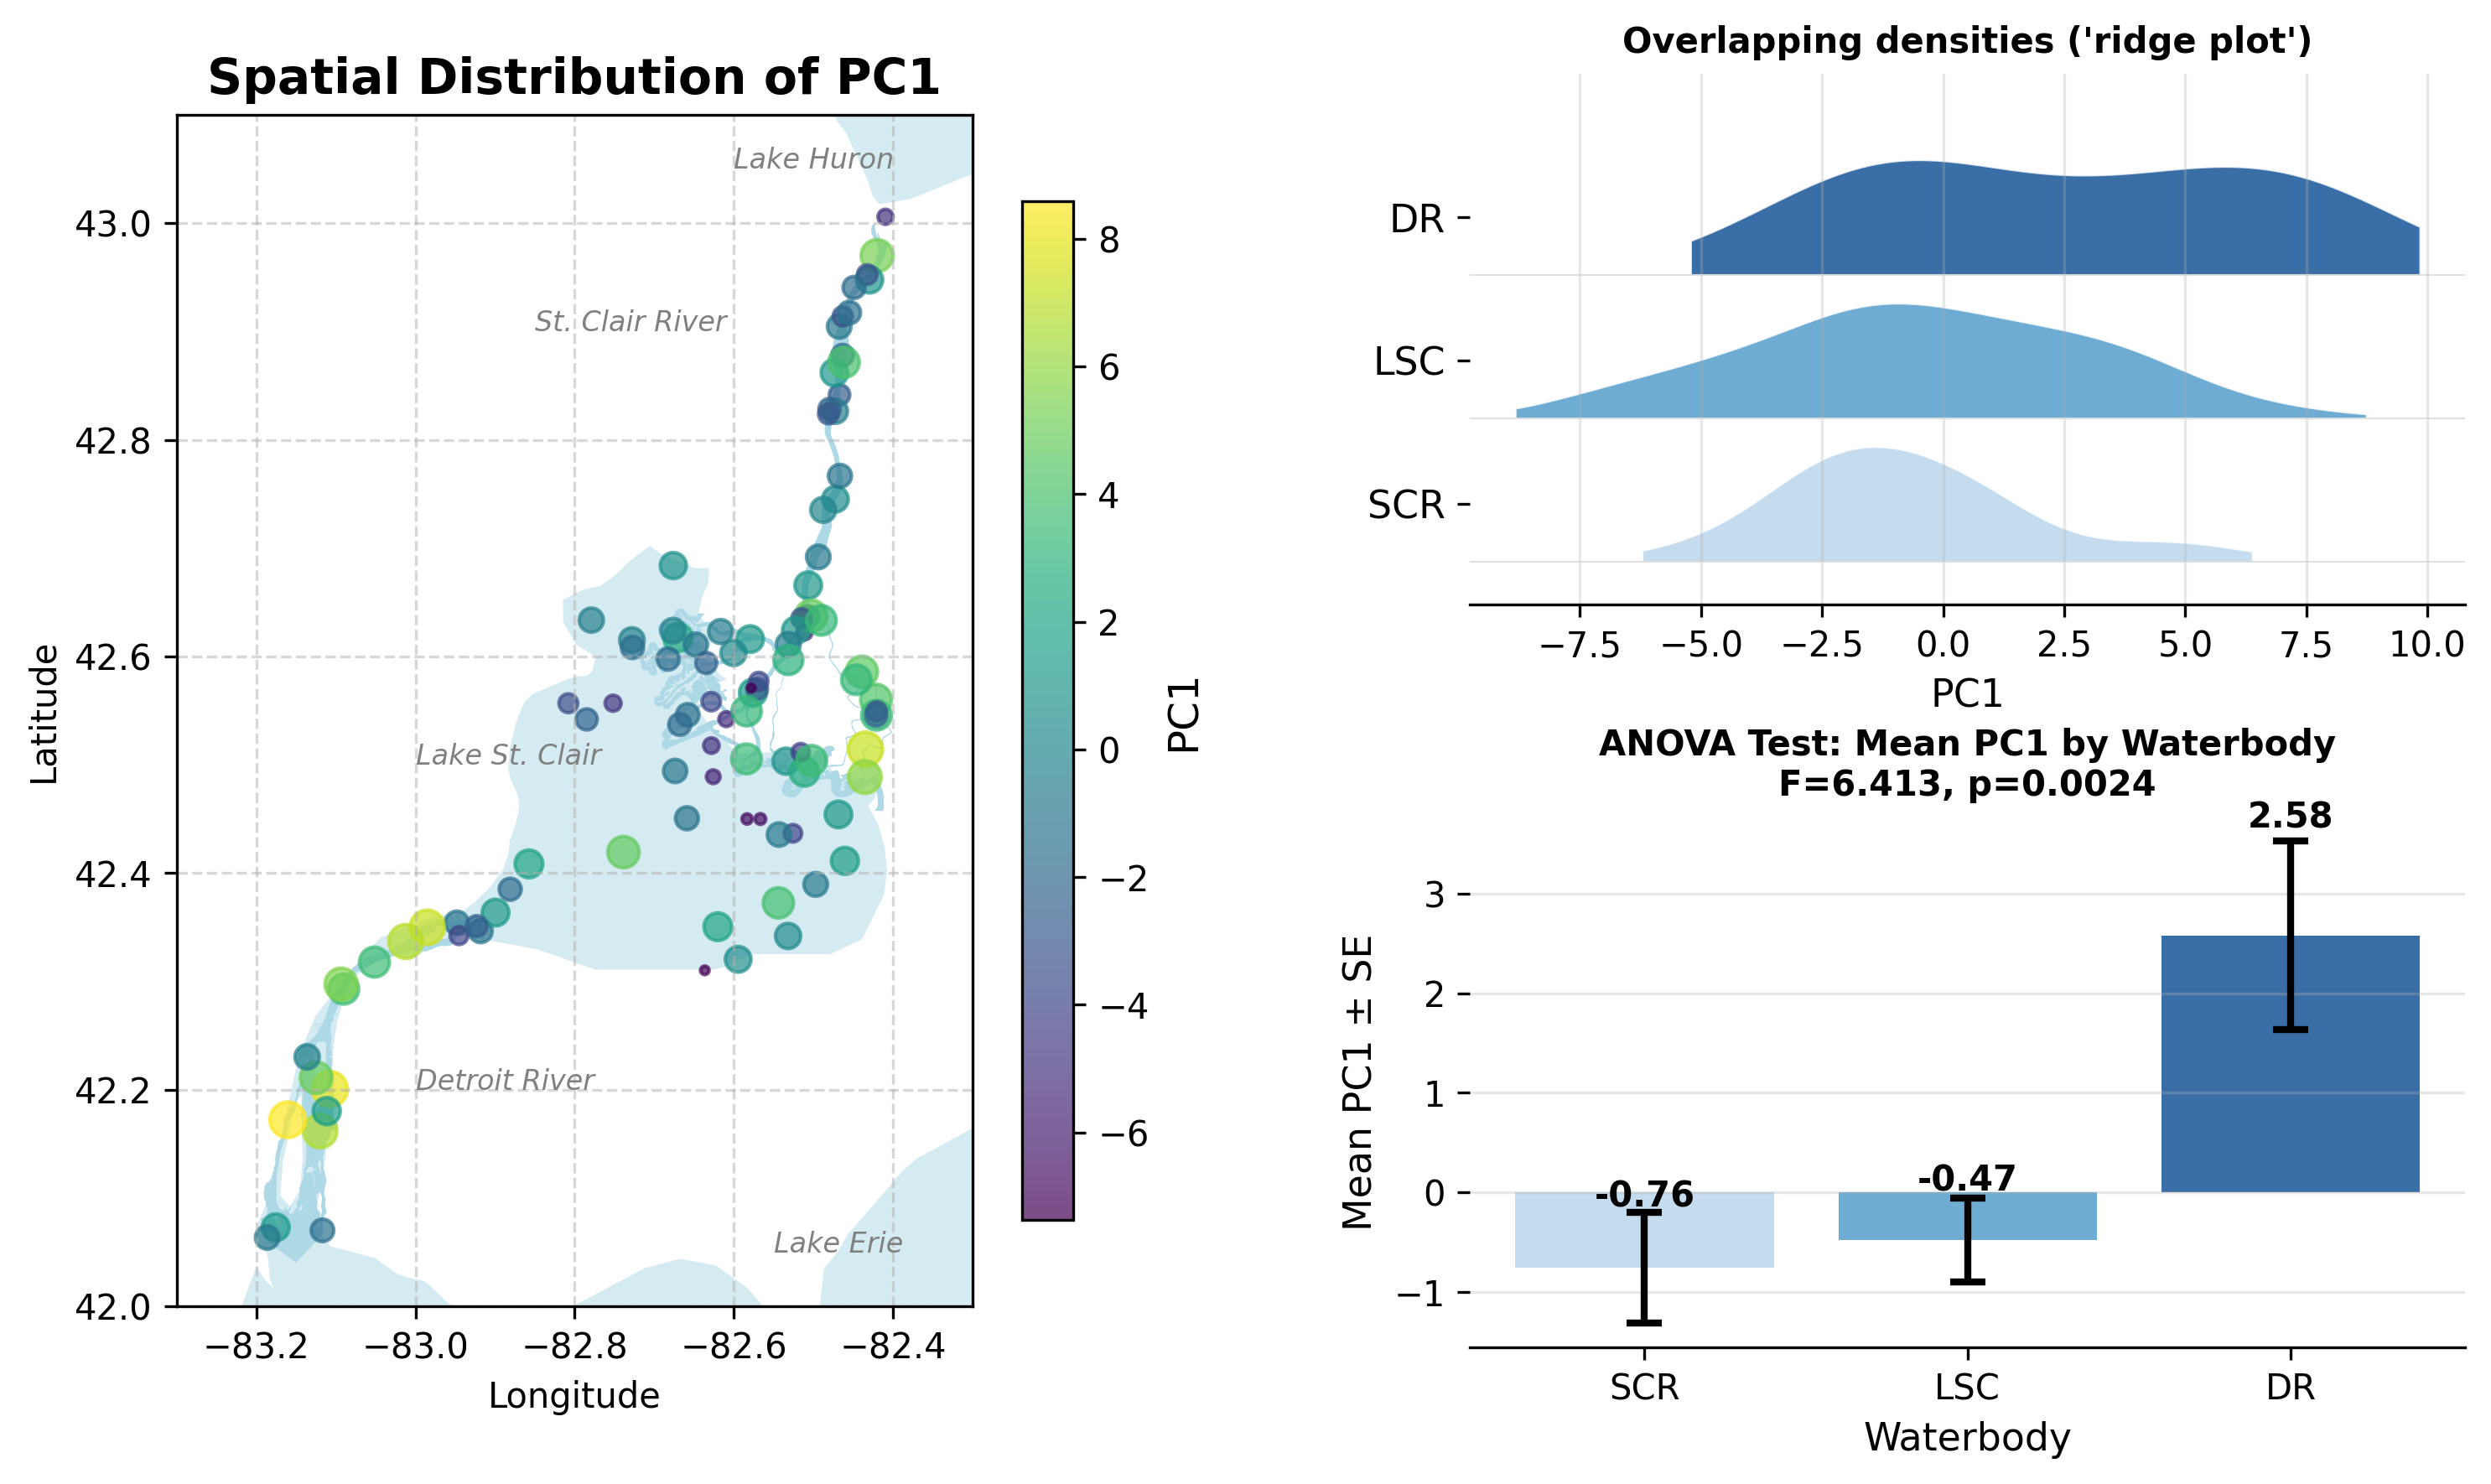

In [217]:
# recall the potential spatial patterns of chemical, it is worth to check the PC scores spatial distribution
# check the spatial distribution of the PC3 scores
feature_name = "PC1"
# add the location to the pollution data for plotting
pc_scores["Latitude"] = raw_data["Latitude"]
pc_scores["Longitude"] = raw_data["Longitude"]
pc_scores["Waterbody"] = raw_data["Waterbody"]
fig, f_stat, p_value = plot_feature_analysis(pc_scores, feature_name)
# drop off the added location columns to keep pc_scores clean
pc_scores.drop(columns=["Latitude", "Longitude", "Waterbody"], inplace=True)

A critical ecotoxicological question is: 

<span style="color:blue">'Does it truly reflect the overall contamination level by summing up the raw PC scores?'</span>

It is known that the magnitudes of raw chemical concentrations do not reflect the toxicity levels because chemicals of equal concentrations usually have different toxicities, not to mention that some chemicals are naturally of high concentration.

Applying PCA on the preprocessed chemicals (eliminate the magnitude effects) gives the PC scores, 
which should reflect the relative contamination levels across sites regardless of the raw magnitudes.

**However,** the PCs with low importance (low explained variance ratio) carry smaller loadings on chemicals overall. It makes the **low-importance PCs contribute less** to the summed contamination assessment score, which **might be misleading** if those PCs actually represent important contamination sources.

**This concern actually points to the need for precise toxicity levels of chemicals or the PCs.**
It usually needs expertise knowledge or toxicological evidence to assign weights to PCs for more accurate contamination assessment, which is out of the scope of this work.

That is to say, <span style="color:blue"> acknowledging and addressing toxicity difference in human view among the PCs is beyond the current study scope.</span> 

Recall the final purpose: **Zoobenthic Community Indicator of Sediment Contamination**, it asks for invertebrate's view on the contamination levels. Although we can not address the toxicity values in human view, we may read out <span style="color:blue">the toxicity values in invertebrate's view </span>by correlating the PC scores with the zoobenthic community composition.

## TO DO: ANOVA of taxa composition against levels of PC scores (stressor)

<span style="color:green">
This can be an extension to sort the importance of the PCs (stressor) by checking how taxa composition varies along the levels of each PC score.
</span>

Assume **invertebrate composition** indicates the community condition, regardless the invertebrate abundance. 

It forces a two-step transformation on the invertebrate abundance data:
1. **Total standardization**, the relative abundance of taxon \(j\) at site \(i\) is:

    $$
    p_{ij} = \frac{x_{ij}}{\sum_{j=1}^{m} x_{ij}}, \quad j = 1, \dots, m
    $$

2. **Chord normalization**, the chord-normalized relative abundance of taxon \(j\) at site \(i\) is:
    
    $$
    c_{ij} = \frac{p_{ij}}{\sqrt{\sum_{j=1}^{m} p_{ij}^2}}, \quad j = 1, \dots, m
    $$

    Each site \(i\) is represented as a column vector in the m-dimensional taxa space:
    
    $$
    \mathbf{c}_i = \begin{pmatrix} c_{i1} \\ c_{i2} \\ \vdots \\ c_{im} \end{pmatrix}
    $$
    
    where the norm of each vector equals 1:
    
    $$
    \|\mathbf{c}_i\| = \sqrt{\sum_{j=1}^{m} c_{ij}^2} = 1, \quad i = 1, \dots, n
    $$
    
    This places all sites on the unit hypersphere in the m-dimensional taxa space, where Euclidean distances between sites are determined by composition differences (direction) only.

A way to check on whether the taxa composition varies significantly along the levels of a PC score can be as follows:
1. Find a composition vector that can represent all sites **at a certain level** of the PC score.

2. Compute such vectors for all interested levels of the PC score; test their representativeness of the sites at those levels.

3. Compare these representative vectors across levels of scores, if their directions differ along the PC score levels accordingly, then this PC score (stressor) significantly affects the taxa composition.

In [ ]:
# take the raw taxa data
taxa = get_block(data, "taxa")

# total sandardization
chord_taxa = taxa.values / np.sum(taxa.values, axis = 1)[:, np.newaxis] 
# chord normalization
chord_taxa = chord_taxa / np.sqrt(np.sum(chord_taxa**2, axis = 1))[:, np.newaxis]
# convert the array back to a dataframe
chord_taxa = pd.DataFrame(chord_taxa, index = taxa.index, columns = taxa.columns)
chord_taxa.head()

var,Acari,Amphipoda,Caenis,Ceratopogonidae,Chironomidae,Dreissena,Gastropoda,Hexagenia,Hirudinea,Hydropsychidae,Hydrozoa,Nematoda,Oligochaeta,Other Trichoptera,Sphaeriidae,Turbellaria
StationID,,,,,,,,,,,,,,,,
A10,4.505337e-17,4.505337e-17,4.505337e-17,4.505337e-17,0.292208,4.505337e-17,4.505337e-17,4.505337e-17,4.505337e-17,4.505337e-17,4.505337e-17,0.242920,0.924989,4.505337e-17,4.505337e-17,4.505337e-17
A23,3.698943e-17,3.698943e-17,6.925322e-02,2.019243e-02,0.565845,3.698943e-17,1.071043e-01,3.255045e-01,3.698943e-17,3.698943e-17,3.698943e-17,0.280356,0.678134,3.698943e-17,1.180247e-01,6.925322e-02
A27,4.094623e-17,4.094623e-17,4.094623e-17,4.094623e-17,0.404363,4.094623e-17,4.094623e-17,1.684177e-01,4.094623e-17,4.094623e-17,4.094623e-17,0.230360,0.818340,2.019774e-01,1.684177e-01,1.273608e-01
A28,3.476278e-17,3.476278e-17,3.476278e-17,3.476278e-17,0.460456,3.476278e-17,3.476278e-17,2.223835e-01,3.107450e-01,3.476278e-17,3.476278e-17,0.300789,0.636767,2.223835e-01,3.107450e-01,3.476278e-17
A29,3.521411e-17,3.521411e-17,3.521411e-17,3.521411e-17,0.569602,3.521411e-17,3.521411e-17,3.059144e-01,3.521411e-17,3.521411e-17,3.521411e-17,0.507469,0.569602,3.521411e-17,3.521411e-17,3.521411e-17


A quick reminder of spatial patterns might exist in the taxa composition. Check it with the spatial distribution of an example taxa.

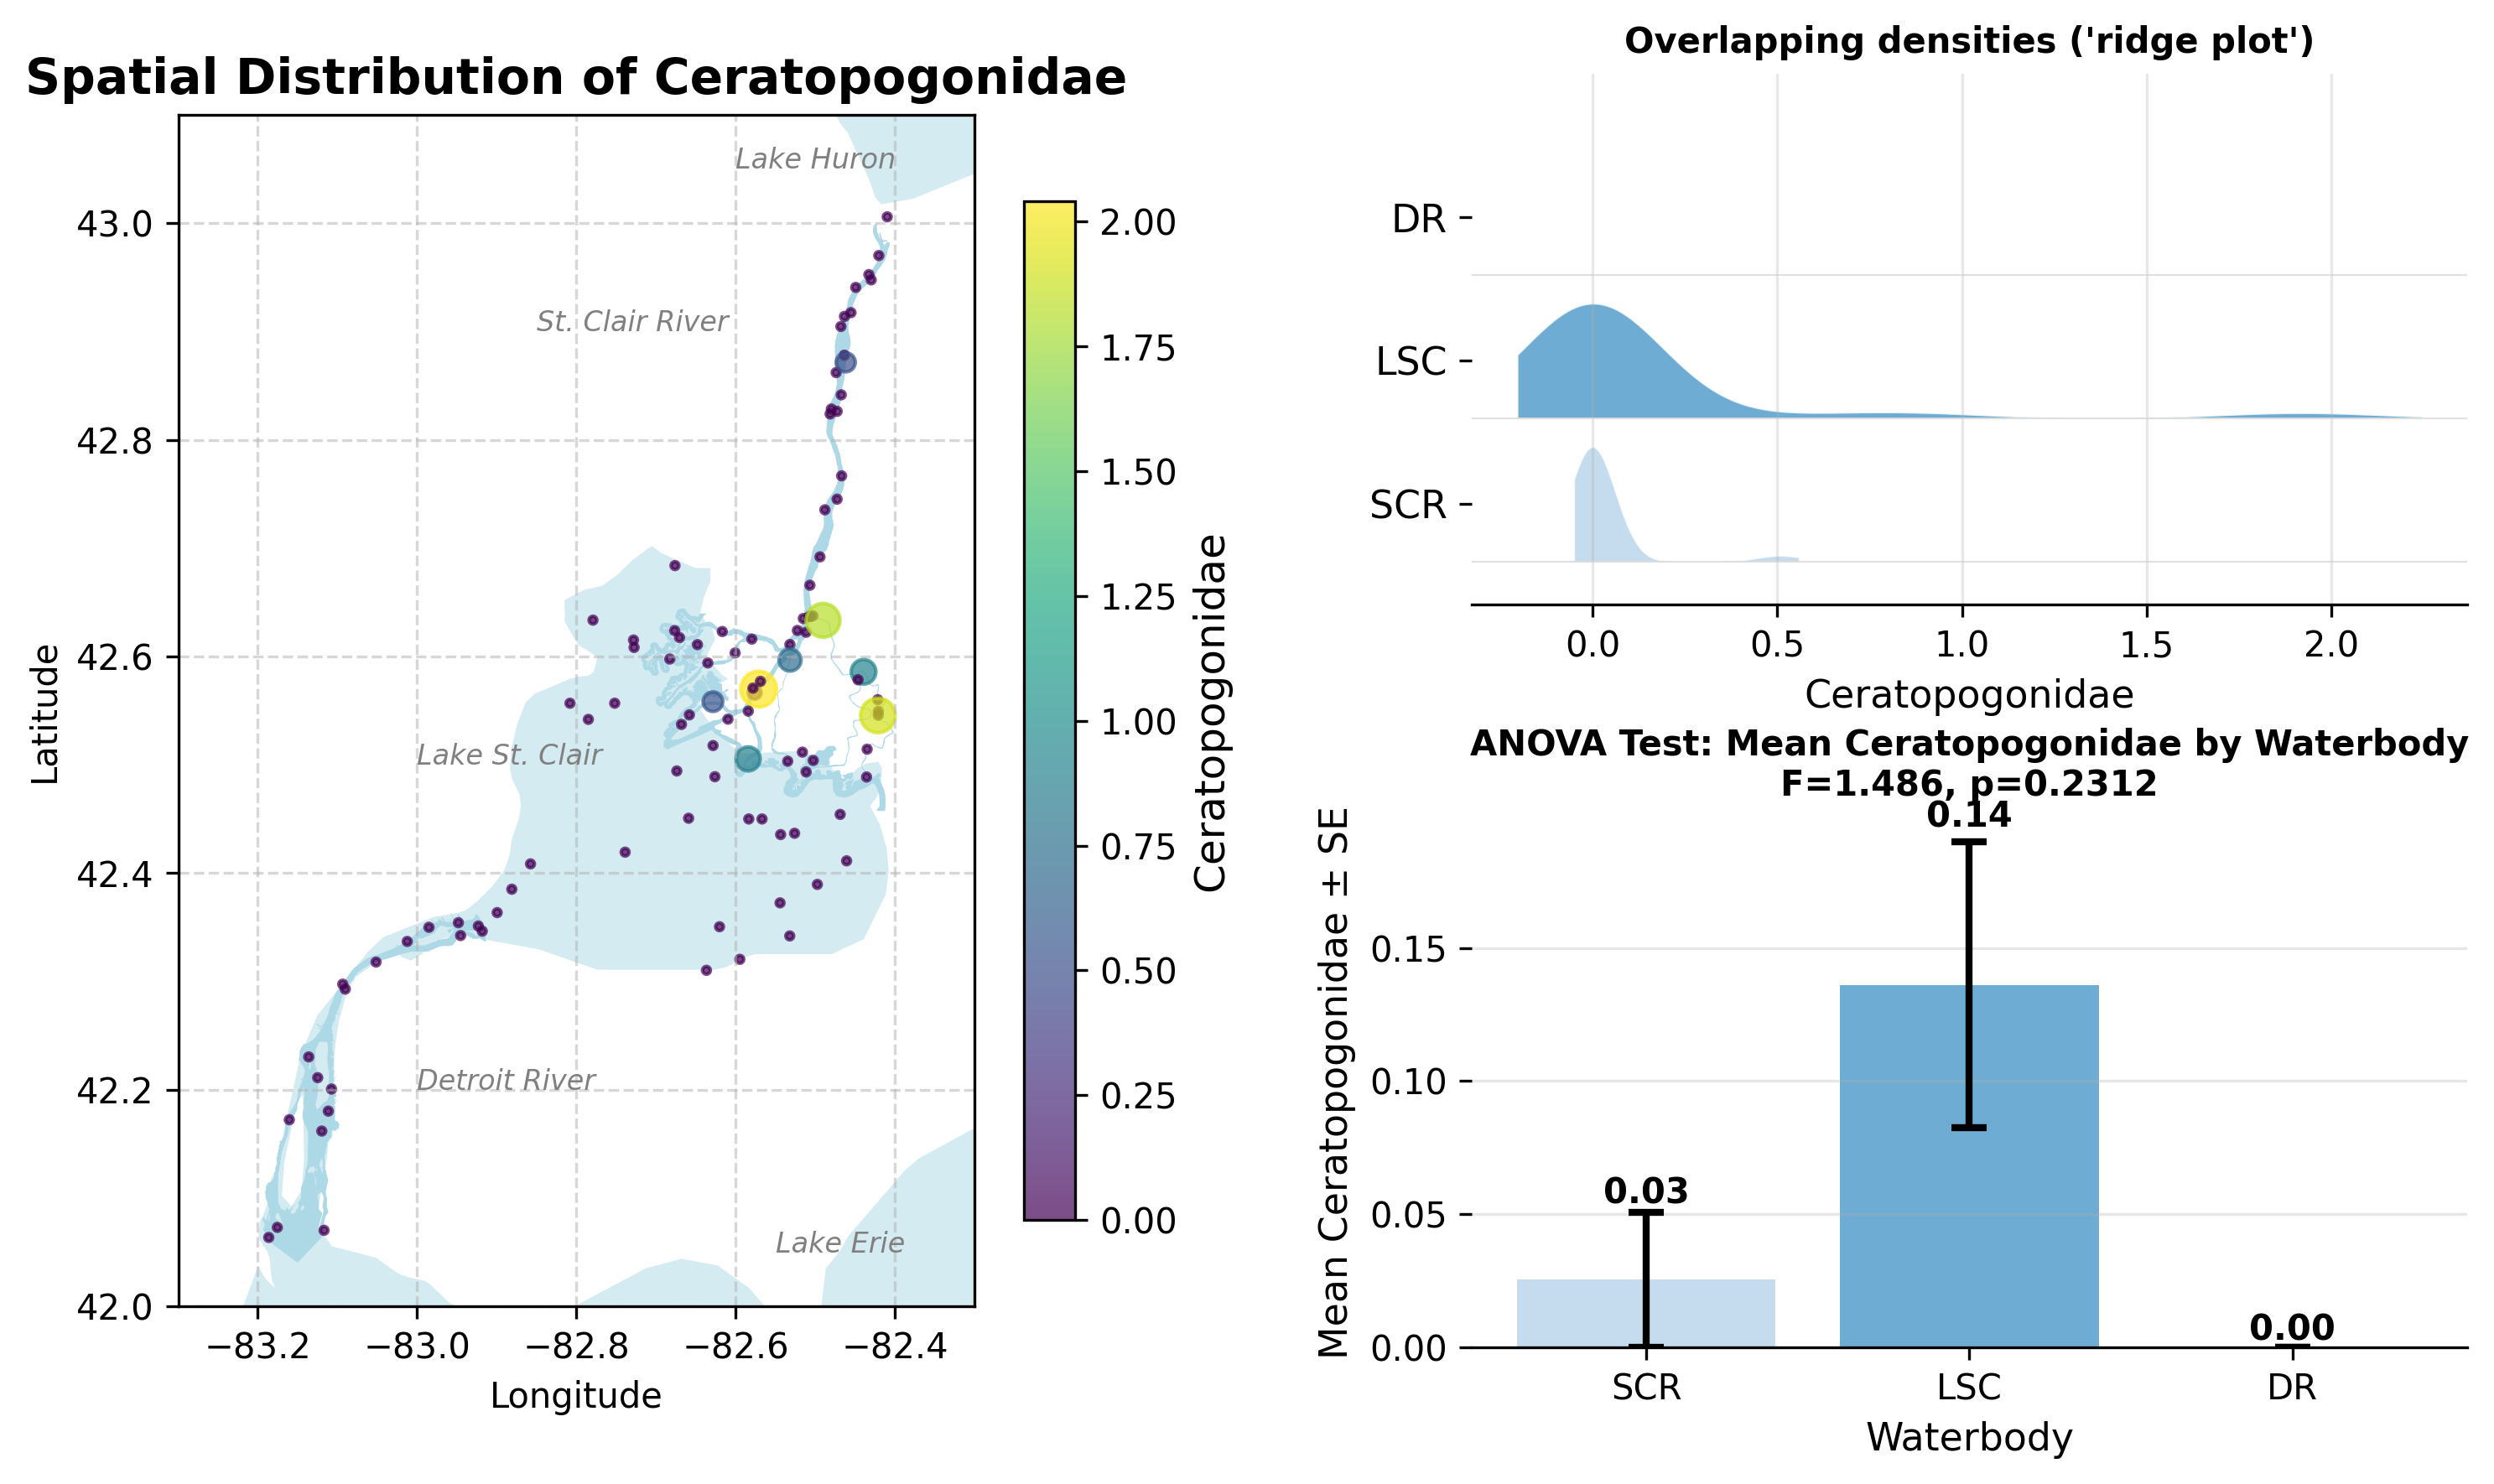

In [263]:
# check the potential spatial patterns of a specific taxa: Ceratopogonidae
feature_name = "Ceratopogonidae"
# add the location to the pollution data for plotting
taxa["Latitude"] = raw_data["Latitude"]
taxa["Longitude"] = raw_data["Longitude"]
taxa["Waterbody"] = raw_data["Waterbody"]
# only plot the sites in LSC
fig, f_stat, p_value = plot_feature_analysis(taxa, feature_name)
# drop off the added location columns to keep pc_scores clean
taxa.drop(columns=["Latitude", "Longitude", "Waterbody"], inplace=True)

## Compute the contamination score by summing the PC scores for sites

**<span style="color:blue">If we assume all stressors (PCs) are equally pollutant</span>**, then the importance (eigenvalue) differences among PCs are pulling down the contributions of low-importance PCs to the summed contamination score, which conflicts with the equal pollutant assumption.

However, pollution levels indeed correlate with the chemical abundance magnitudes to some extent, it is misleading to do rank-based transformation on the PC scores to measure the contamination levels.
That is to say, <span style="color:blue">the pollution level of a certain amount of chemicals or stressors should not change when there are newly extreme values introduced</span>.

Therefore, a Min-Max Scaling that maps all PC scores to $[0, 1]$ is not desirable due to the above concern (a new extreme value distorts the original pollution value of the same amount of chemicals). 
It is better to apply a z-score standardization, although it is still affected by extreme values that change the $\bar x$ and $\hat \sigma$, but it preserves the relative distances between sites in the z-scored PC score space.

Each $PC$ score is standardized as:

$$
PC_{ij}^{(z)} = \frac{PC_{ij} - \bar{PC_j}}{\hat \sigma_{PC_j}}, \quad j = 1, \dots, k
$$

Check the distribution of these PC scores, their ranges should be closer after the z-score standardization.

Finally, sum these standardized PC scores to get the contamination score for each site.

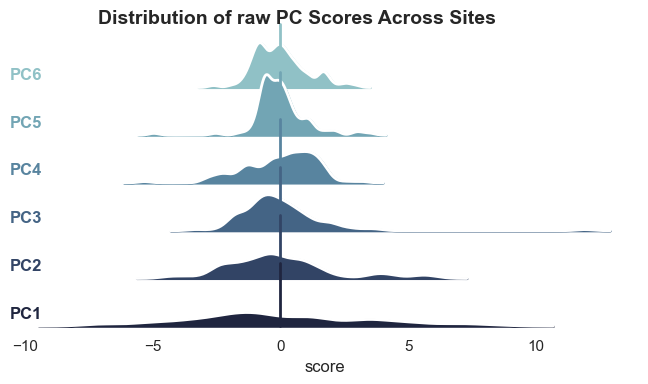

In [297]:
# check the values of raw PC scores that betray the assumption of equally pollutant
import seaborn as sns
import warnings
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Suppress the specific tight_layout warning
warnings.filterwarnings('ignore', message='Tight layout not applied.*')

# Prepare data for ridge plot - melt the PC scores into long format
pc_scores_melted = pc_scores.iloc[:, ::-1].melt(var_name='PC', value_name='score')

# Initialize the FacetGrid object with adjusted parameters to avoid layout issues
pal = sns.cubehelix_palette(len(pc_scores.columns), rot=-.25, light=.7)
g = sns.FacetGrid(pc_scores_melted, row="PC", hue="PC", aspect=12, height=.6, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "score",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "score", clip_on=False, color="w", lw=2, bw_adjust=.5)

# Add reference line at zero
g.refline(x=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(score, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "score")

# Set the subplots to overlap with manual spacing adjustment
g.figure.subplots_adjust(hspace=-.25, top=0.92, bottom=0.08)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# Add overall title with adjusted position
g.figure.suptitle('Distribution of raw PC Scores Across Sites', 
                  fontsize=14, fontweight='bold', y=0.96)

plt.show()

In [298]:
# z-score transform the pc scores
z_score_pc_scores = (pc_scores - pc_scores.mean()) / pc_scores.std()
z_score_pc_scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6
StationID,,,,,,
A10,-0.243773,-0.166500,-0.202258,0.691230,-0.931085,1.782848
A23,0.401809,0.258358,0.018883,0.674043,0.069347,1.095815
A27,1.201965,-1.032981,-0.612002,-0.121283,0.947986,0.520043
A28,0.954087,-1.096815,-0.986272,-0.560172,0.963292,-0.085481
A29,2.048113,-1.032546,-0.915949,-0.226260,1.160582,-0.110946


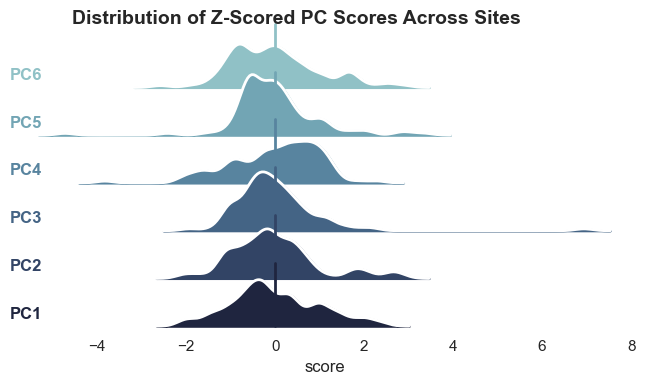

In [ ]:
# Create overlapping ridge plot for z-scored PC scores using seaborn FacetGrid
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Suppress the specific tight_layout warning
warnings.filterwarnings('ignore', message='Tight layout not applied.*')

# Prepare data for ridge plot - melt the PC scores into long format
pc_scores_melted = z_score_pc_scores.iloc[:, ::-1].melt(var_name='PC', value_name='score')

# Initialize the FacetGrid object with adjusted parameters to avoid layout issues
pal = sns.cubehelix_palette(len(z_score_pc_scores.columns), rot=-.25, light=.7)
g = sns.FacetGrid(pc_scores_melted, row="PC", hue="PC", aspect=12, height=.6, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "score",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "score", clip_on=False, color="w", lw=2, bw_adjust=.5)

# Add reference line at zero
g.refline(x=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(score, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "score")

# Set the subplots to overlap with manual spacing adjustment
g.figure.subplots_adjust(hspace=-.25, top=0.92, bottom=0.08)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# Add overall title with adjusted position
g.figure.suptitle('Distribution of Z-Scored PC Scores Across Sites', 
                  fontsize=14, fontweight='bold', y=0.96)

plt.show()

### Abnormal detected: extreme values found in PC3 scores

Some sites have extremely high PC3 scores, it requires further investigation on the highly loaded chemicals
by PC3. The checking steps can be as follows:
1. Identify which sites have extremely high PC3 scores (e.g., above 3 standard deviations).
2. Check the raw chemical values at these sites, decide whether these values are abnormally high or reasonable.

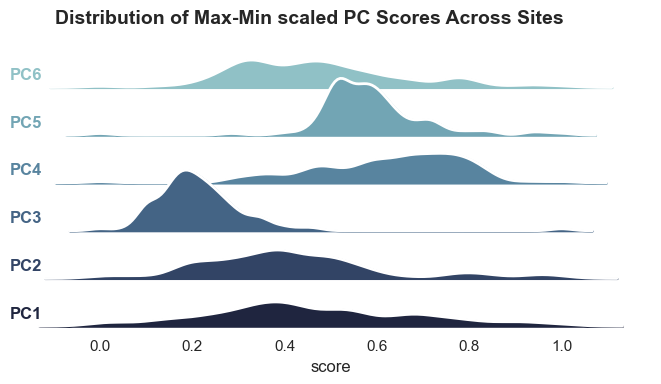

In [302]:
# check the results of Min-Max scaling of PC scores
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
minmax_pc_scores = pd.DataFrame(scaler.fit_transform(pc_scores),
                                columns = pc_scores.columns,
                                index = pc_scores.index)


# Suppress the specific tight_layout warning
warnings.filterwarnings('ignore', message='Tight layout not applied.*')

# Prepare data for ridge plot - melt the PC scores into long format
pc_scores_melted = minmax_pc_scores.iloc[:, ::-1].melt(var_name='PC', value_name='score')

# Initialize the FacetGrid object with adjusted parameters to avoid layout issues
pal = sns.cubehelix_palette(len(minmax_pc_scores.columns), rot=-.25, light=.7)
g = sns.FacetGrid(pc_scores_melted, row="PC", hue="PC", aspect=12, height=.6, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "score",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "score", clip_on=False, color="w", lw=2, bw_adjust=.5)

# Add reference line at the middle of Min-Max scaled range
# g.refline(x=0.5, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(score, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "score")

# Set the subplots to overlap with manual spacing adjustment
g.figure.subplots_adjust(hspace=-.25, top=0.92, bottom=0.08)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# Add overall title with adjusted position
g.figure.suptitle('Distribution of Max-Min scaled PC Scores Across Sites', 
                  fontsize=14, fontweight='bold', y=0.96)

plt.show()

It turns out that there are some extremely large values in PC3 scores.
It is worth to check it due to such very-long tailed distribution.

In [317]:
# check the extreme values in PC3 scores
print(z_score_pc_scores.sort_values(by="PC3", ascending=False).head(10)) # S85 is extremely high
# let us check the raw data of S85 and its related chemicals of PC3
print(
    """The raw data of site S85 for chemicals highly loaded on PC3:\n"""
    f"""{raw_data.loc["S85", ["Heptachlor Epoxide", "p,p'-DDE", "mirex", "p,p'-DDD", "Cd", "Hg", "Pb", "total PCB"]]}"""
      )
print("================================================")
print(f"The value of p,p'-DDD of site S85 is {raw_data.loc['S85', "p,p'-DDD"]},\nwhich is extremely high compared to all p,p'-DDD values ranging from")
print("=================================================")
print(f"The summary statistics of p,p'-DDD across all sites:")
print(raw_data["p,p'-DDD"].describe())

                PC1       PC2       PC3       PC4       PC5       PC6
StationID                                                            
S85        1.931717 -2.078807  6.939351  0.950743 -0.532986 -2.576696
S10       -0.919790 -0.436069  2.194098  1.082480  3.346258  0.752922
S100       0.378391 -1.196219  1.968423 -1.851899 -0.465479  0.631693
S90        1.549008 -1.257644  1.612679 -0.937354 -4.723818  2.043512
S97       -0.101142 -1.585779  1.523115 -1.720628  0.103091  0.654692
S4        -0.420540  1.741033  1.286248  0.331632  2.080323  0.476287
S57       -0.295167  0.504265  1.159726  0.301872  0.386227 -0.497277
S36       -0.874990  0.019665  1.149420  0.852777  1.768063  0.092148
S12       -0.159542  1.732519  1.147829  0.689946  0.631219  1.667940
S5         1.128640  1.708102  1.139419 -0.074740 -0.093286 -0.827188
The raw data of site S85 for chemicals highly loaded on PC3:
var
Heptachlor Epoxide      0.244289
p,p'-DDE                6.562742
mirex                   3.425